In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('CompData-1.xlsx')

In [3]:
df.head()

Co_Code          Co_Name  _Operating_Expense_Rate  \
0    16974      Hind.Cables             8.820000e+09   
1    21214  Tata Tele. Mah.             9.380000e+09   
2    14852     ABG Shipyard             3.800000e+09   
3     2439              GTL             6.440000e+09   
4    23505  Bharati Defence             3.680000e+09   

   _Research_and_development_expense_rate  _Cash_flow_rate  \
0                            0.000000e+00         0.462045   
1                            4.230000e+09         0.460116   
2                            8.150000e+08         0.449893   
3                            0.000000e+00         0.462731   
4                            0.000000e+00         0.463117   

   _Interest_bearing_debt_interest_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
0                              0.000352     0.001417              0.322558   
1                              0.000716     0.000000              0.315520   
2                              0.000496     0.000000              0.299851   
3                              0.000592     0.009313              0.319834   
4                              0.000782     0.400243              0.325104   

   _Per_Share_Net_profit_before_tax_Yuan_  \
0                                0.194472   
1                                0.161633   
2                                0.172554   
3                                0.174738   
4                                0.176546   

   _Realized_Sales_Gross_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
0                                  0.022074  ...              0.310901   
1                                  0.021902  ...              0.314572   
2                                  0.022186  ...              0.314777   
3                                  0.027638  ...              0.316974   
4                                  0.022072  ...              0.317729   

   _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
0                              0.034913                       0   
1                              0.041653                       0   
2                              0.033560                       0   
3                              0.016527                       0   
4                              0.034497                       0   

   _Total_assets_to_GNP_price  _No_credit_Interval  \
0                    0.028801             0.620927   
1                    0.006191             0.622513   
2                    0.001095             0.623749   
3                    0.003749             0.622963   
4                    0.006595             0.624419   

   _Degree_of_Financial_Leverage_DFL  \
0                           0.026930   
1                           0.026297   
2                           0.027276   
3                           0.026988   
4                           0.027498   

   _Interest_Coverage_Ratio_Interest_expense_to_EBIT  _Net_Income_Flag  \
0                                           0.565744                 1   
1                                           0.560741                 1   
2                                           0.566744                 1   
3                                           0.565950                 1   
4                                           0.567177                 1   

   _Equity_to_Liability  Default  
0              0.015338        0  
1              0.029445        1  
2              0.041718        0  
3              0.026956        0  
4              0.019900        0  

[5 rows x 58 columns]

In [4]:
df.columns = [col.lstrip('_') for col in df.columns]

In [5]:
df.columns

Index(['Co_Code', 'Co_Name', 'Operating_Expense_Rate',
       'Research_and_development_expense_rate', 'Cash_flow_rate',
       'Interest_bearing_debt_interest_rate', 'Tax_rate_A',
       'Cash_Flow_Per_Share', 'Per_Share_Net_profit_before_tax_Yuan_',
       'Realized_Sales_Gross_Profit_Growth_Rate',
       'Operating_Profit_Growth_Rate', 'Continuous_Net_Profit_Growth_Rate',
       'Total_Asset_Growth_Rate', 'Net_Value_Growth_Rate',
       'Total_Asset_Return_Growth_Rate_Ratio', 'Cash_Reinvestment_perc',
       'Current_Ratio', 'Quick_Ratio', 'Interest_Expense_Ratio',
       'Total_debt_to_Total_net_worth', 'Long_term_fund_suitability_ratio_A',
       'Net_profit_before_tax_to_Paid_in_capital', 'Total_Asset_Turnover',
       'Accounts_Receivable_Turnover', 'Average_Collection_Days',
       'Inventory_Turnover_Rate_times', 'Fixed_Assets_Turnover_Frequency',
       'Net_Worth_Turnover_Rate_times', 'Operating_profit_per_person',
       'Allocation_rate_per_person', 'Quick_Assets_to_Total_

In [6]:
df.shape

(2058, 58)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Co_Code                                           2058 non-null   int64  
 1   Co_Name                                           2058 non-null   object 
 2   Operating_Expense_Rate                            2058 non-null   float64
 3   Research_and_development_expense_rate             2058 non-null   float64
 4   Cash_flow_rate                                    2058 non-null   float64
 5   Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   Tax_rate_A                                        2058 non-null   float64
 7   Cash_Flow_Per_Share                               1891 non-null   float64
 8   Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   Realized_Sales_Gros

In [8]:
df.describe().T

count          mean  \
Co_Code                                           2058.0  1.757211e+04   
Operating_Expense_Rate                            2058.0  2.052389e+09   
Research_and_development_expense_rate             2058.0  1.208634e+09   
Cash_flow_rate                                    2058.0  4.652426e-01   
Interest_bearing_debt_interest_rate               2058.0  1.113022e+07   
Tax_rate_A                                        2058.0  1.147770e-01   
Cash_Flow_Per_Share                               1891.0  3.199856e-01   
Per_Share_Net_profit_before_tax_Yuan_             2058.0  1.769673e-01   
Realized_Sales_Gross_Profit_Growth_Rate           2058.0  2.276117e-02   
Operating_Profit_Growth_Rate                      2058.0  8.481083e-01   
Continuous_Net_Profit_Growth_Rate                 2058.0  2.173915e-01   
Total_Asset_Growth_Rate                           2058.0  5.287663e+09   
Net_Value_Growth_Rate                             2058.0  5.189504e+06   
Total_Asset_Return_Growth_Rate_Ratio              2058.0  2.641004e-01   
Cash_Reinvestment_perc                            2058.0  3.771970e-01   
Current_Ratio                                     2058.0  1.336249e+06   
Quick_Ratio                                       2058.0  2.775510e+07   
Interest_Expense_Ratio                            2058.0  6.312913e-01   
Total_debt_to_Total_net_worth                     2037.0  1.071429e+07   
Long_term_fund_suitability_ratio_A                2058.0  8.973310e-03   
Net_profit_before_tax_to_Paid_in_capital          2058.0  1.753994e-01   
Total_Asset_Turnover                              2058.0  1.286405e-01   
Accounts_Receivable_Turnover                      2058.0  4.159864e+07   
Average_Collection_Days                           2058.0  2.629786e+07   
Inventory_Turnover_Rate_times                     2058.0  2.030227e+09   
Fixed_Assets_Turnover_Frequency                   2058.0  1.230898e+09   
Net_Worth_Turnover_Rate_times                     2058.0  3.957710e-02   
Operating_profit_per_person                       2058.0  4.036693e-01   
Allocation_rate_per_person                        2058.0  5.725559e+06   
Quick_Assets_to_Total_Assets                      2058.0  3.421979e-01   
Cash_to_Total_Assets                              1962.0  7.993675e-02   
Quick_Assets_to_Current_Liability                 2058.0  1.190476e+07   
Cash_to_Current_Liability                         2058.0  9.282507e+07   
Operating_Funds_to_Liability                      2058.0  3.482338e-01   
Inventory_to_Working_Capital                      2058.0  2.777491e-01   
Inventory_to_Current_Liability                    2058.0  5.786346e+07   
Long_term_Liability_to_Current_Assets             2058.0  7.340107e+07   
Retained_Earnings_to_Total_Assets                 2058.0  9.303546e-01   
Total_income_to_Total_expense                     2058.0  2.357977e-03   
Total_expense_to_Assets                           2058.0  3.109208e-02   
Current_Asset_Turnover_Rate                       2058.0  1.273303e+09   
Quick_Asset_Turnover_Rate                         2058.0  2.571768e+09   
Cash_Turnover_Rate                                2058.0  2.653696e+09   
Fixed_Assets_to_Assets                            2058.0  4.042760e+06   
Cash_Flow_to_Total_Assets                         2058.0  6.442325e-01   
Cash_Flow_to_Liability                            2058.0  4.599747e-01   
CFO_to_Assets                                     2058.0  5.797344e-01   
Cash_Flow_to_Equity                               2058.0  3.146292e-01   
Current_Liability_to_Current_Assets               2044.0  3.935178e-02   
Liability_Assets_Flag                             2058.0  3.401361e-03   
Total_assets_to_GNP_price                         2058.0  2.779397e+07   
No_credit_Interval                                2058.0  6.236856e-01   
Degree_of_Financial_Leverage_DFL                  2058.0  2.785248e-02   
Interest_Coverage_Ratio_Interest_expense_to_EBIT  2058.

In [9]:
df.tail(10)

Co_Code           Co_Name  Operating_Expense_Rate  \
2048      398      Mysore Petro            8.680000e+09   
2049     1492      Konark Synth            1.171400e-04   
2050    44425        R&B Denims            8.080000e+08   
2051    54848       SYMBIOX INV            3.390460e-04   
2052     5758   Smruthi Organic            1.576130e-04   
2053     2743  Kothari Ferment.            3.021580e-04   
2054    21216    Firstobj.Tech.            1.371450e-04   
2055      142  Diamines & Chem.            2.114990e-04   
2056    18014       IL&FS Engg.            3.750000e+09   
2057    43229      Channel Nine            2.981110e-04   

      Research_and_development_expense_rate  Cash_flow_rate  \
2048                           5.670000e+09        0.460737   
2049                           5.600000e+08        0.460716   
2050                           0.000000e+00        0.466648   
2051                           2.040820e-04        0.449240   
2052                           2.280000e+09        0.456241   
2053                           6.490000e+09        0.477066   
2054                           0.000000e+00        0.465211   
2055                           8.370000e+09        0.480248   
2056                           0.000000e+00        0.474670   
2057                           0.000000e+00        0.467203   

      Interest_bearing_debt_interest_rate  Tax_rate_A  Cash_Flow_Per_Share  \
2048                             0.000445    0.000000             0.316581   
2049                             0.000474    0.233931                  NaN   
2050                             0.000941    0.000000             0.332461   
2051                             0.000243    0.000000             0.294971   
2052                             0.000316    0.210750                  NaN   
2053                             0.000000    0.183014             0.322063   
2054                             0.000658    0.000000             0.319764   
2055                             0.000502    0.000000             0.327828   
2056                             0.000578    0.306205             0.322027   
2057                             0.000826    0.000000             0.330021   

      Per_Share_Net_profit_before_tax_Yuan_  \
2048                               0.162160   
2049                               0.173834   
2050                               0.162838   
2051                               0.142276   
2052                               0.184680   
2053                               0.192739   
2054                               0.169391   
2055                               0.155005   
2056                               0.173834   
2057                               0.180236   

      Realized_Sales_Gross_Profit_Growth_Rate  ...  Cash_Flow_to_Equity  \
2048                                 0.022011  ...             0.312002   
2049                                 0.022253  ...             0.307240   
2050                                 0.022101  ...             0.313089   
2051                                 0.018330  ...             0.301618   
2052                                 0.022156  ...             0.318138   
2053                                 0.022127  ...             0.320387   
2054                                 0.022072  ...             0.312324   
2055                                 0.021861  ...             0.313122   
2056                                 0.022167  ...             0.315632   
2057                                 0.022418  ...             0.316734   

      Current_Liability_to_Current_Assets  Liability_Assets_Flag  \
2048                             0.036528                      0   
2049                             0.044469                      0   
2050                             0.069926                      0   
2051                             0.035739                      0   
2052                             0.025150                      0   
2053                             0.004430          

In [10]:
df.isnull().sum()

Co_Code                                               0
Co_Name                                               0
Operating_Expense_Rate                                0
Research_and_development_expense_rate                 0
Cash_flow_rate                                        0
Interest_bearing_debt_interest_rate                   0
Tax_rate_A                                            0
Cash_Flow_Per_Share                                 167
Per_Share_Net_profit_before_tax_Yuan_                 0
Realized_Sales_Gross_Profit_Growth_Rate               0
Operating_Profit_Growth_Rate                          0
Continuous_Net_Profit_Growth_Rate                     0
Total_Asset_Growth_Rate                               0
Net_Value_Growth_Rate                                 0
Total_Asset_Return_Growth_Rate_Ratio                  0
Cash_Reinvestment_perc                                0
Current_Ratio                                         0
Quick_Ratio                                     

In [11]:
df["Default"].value_counts()

Default
0    1838
1     220
Name: count, dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop(['Co_Code', 'Co_Name'], axis=1, inplace=True)
df.shape

(2058, 56)

In [14]:
print('Percent of Total Missing Values in the data =' ,(df.isna().sum().sum()*100/df.size).round(2), "%")

Percent of Total Missing Values in the data = 0.26 %


In [15]:
(df==0).sum().sort_values(ascending=False)

Liability_Assets_Flag                               2051
Default                                             1838
Research_and_development_expense_rate                910
Tax_rate_A                                           909
Long_term_Liability_to_Current_Assets                661
Interest_bearing_debt_interest_rate                  170
Inventory_to_Current_Liability                       127
Total_Asset_Turnover                                   6
Fixed_Assets_Turnover_Frequency                        6
Fixed_Assets_to_Assets                                 5
Accounts_Receivable_Turnover                           5
Average_Collection_Days                                5
Allocation_rate_per_person                             5
Cash_Flow_to_Total_Assets                              1
Quick_Asset_Turnover_Rate                              1
Operating_profit_per_person                            1
Total_income_to_Total_expense                          1
Retained_Earnings_to_Total_Asse

<Axes: xlabel='Cash_Flow_Per_Share'>

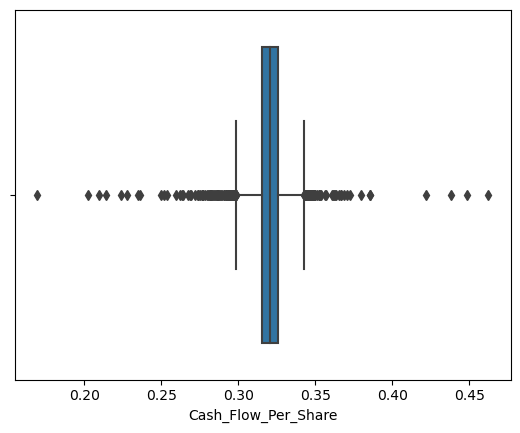

In [16]:
sns.boxplot(data=df, x='Cash_Flow_Per_Share')

<Axes: xlabel='Total_debt_to_Total_net_worth'>

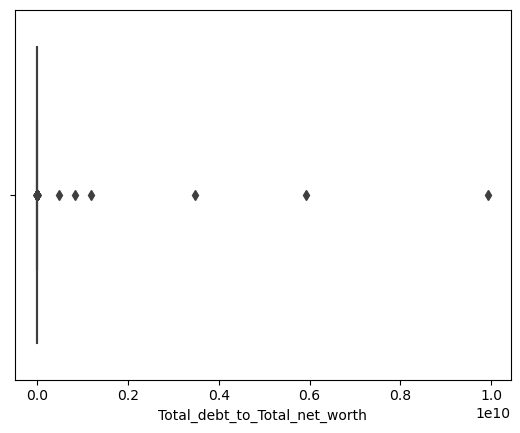

In [17]:
sns.boxplot(data=df, x='Total_debt_to_Total_net_worth')

<Axes: xlabel='Cash_to_Total_Assets'>

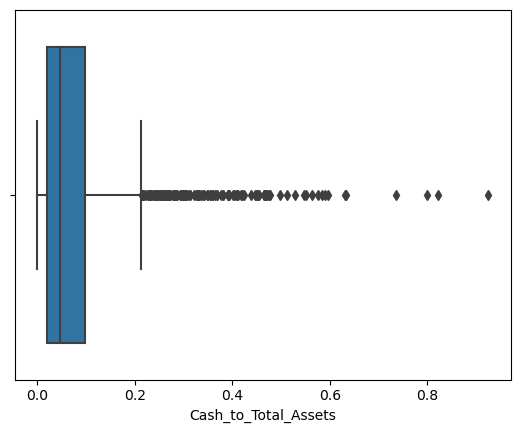

In [18]:
sns.boxplot(data=df, x='Cash_to_Total_Assets')

<Axes: xlabel='Current_Liability_to_Current_Assets'>

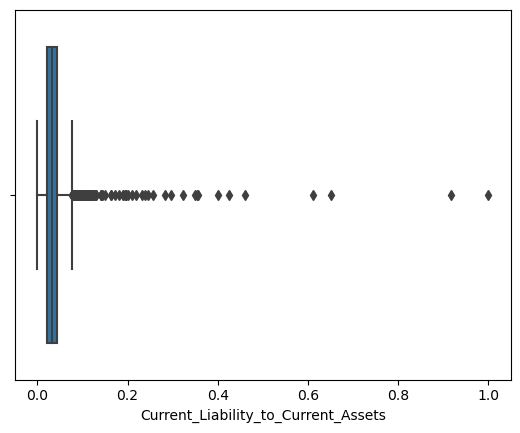

In [19]:
sns.boxplot(data=df, x='Current_Liability_to_Current_Assets')

In [20]:
df_x = df.drop('Default', axis=1)
df_y = df['Default']

In [21]:
df_x['Cash_Flow_Per_Share'].fillna(df_x['Cash_Flow_Per_Share'].median(), inplace=True)
df_x['Total_debt_to_Total_net_worth'].fillna(df_x['Total_debt_to_Total_net_worth'].median(), inplace=True)
df_x['Cash_to_Total_Assets'].fillna(df_x['Cash_to_Total_Assets'].median(), inplace=True)
df_x['Current_Liability_to_Current_Assets'].fillna(df_x['Current_Liability_to_Current_Assets'].median(), inplace=True)

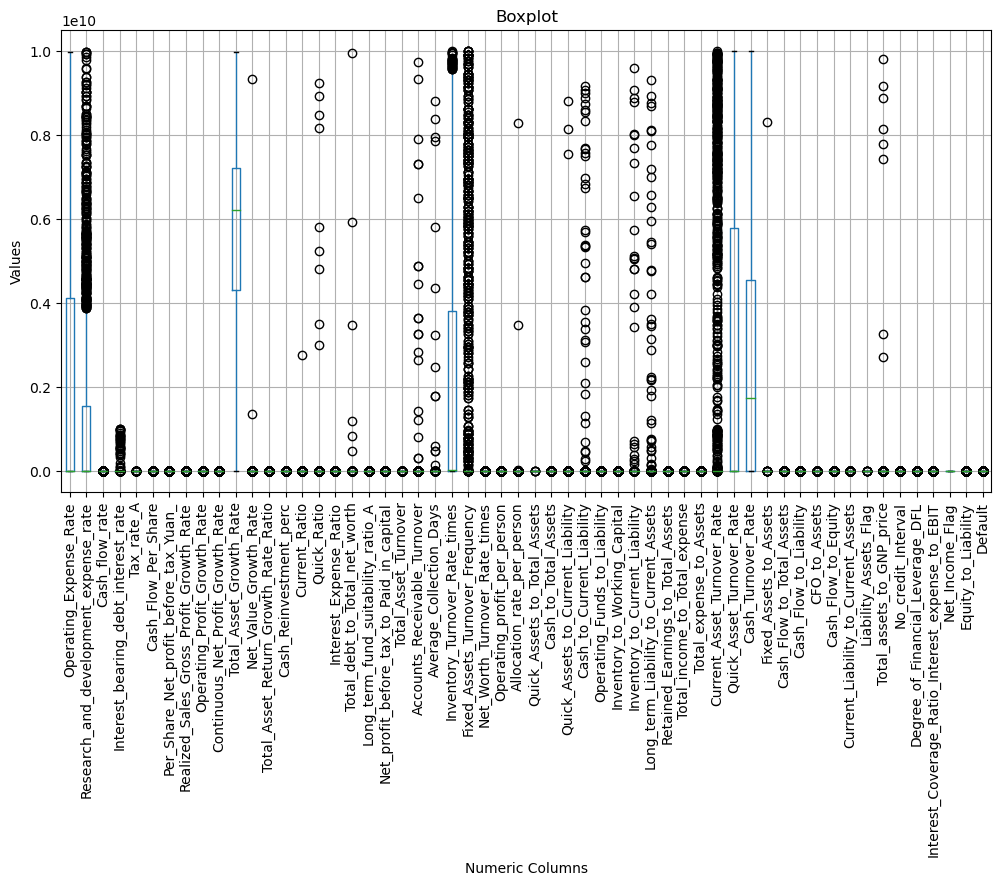

In [22]:
plt.figure(figsize=(12, 6))  
df.boxplot(rot=90)
plt.title('Boxplot')
plt.xlabel('Numeric Columns')
plt.ylabel('Values')

plt.show()

In [23]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [24]:
for column in df_x.columns:
    lr,ur=remove_outlier(df_x[column])
    df_x[column]=np.where(df_x[column]>ur,ur,df_x[column])
    df_x[column]=np.where(df_x[column]<lr,lr,df_x[column])

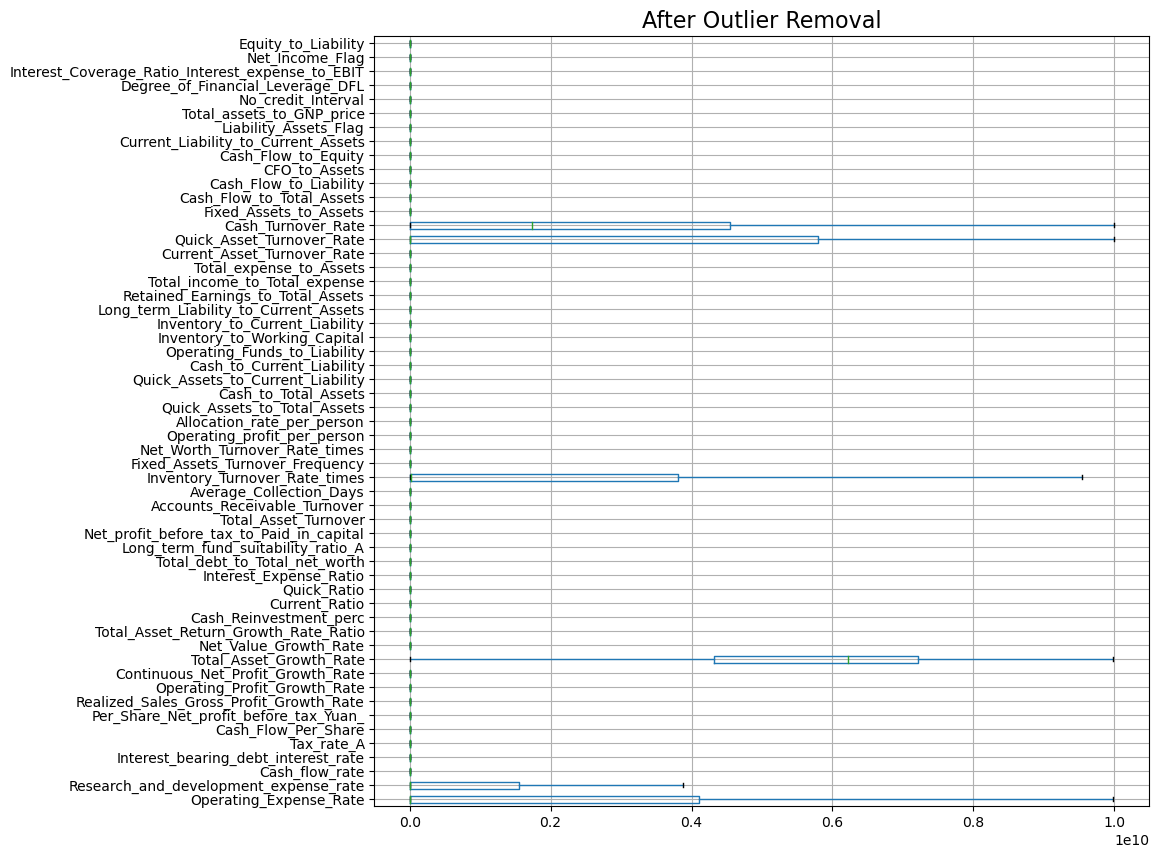

In [25]:
plt.figure(figsize=(10,10))
df_x.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

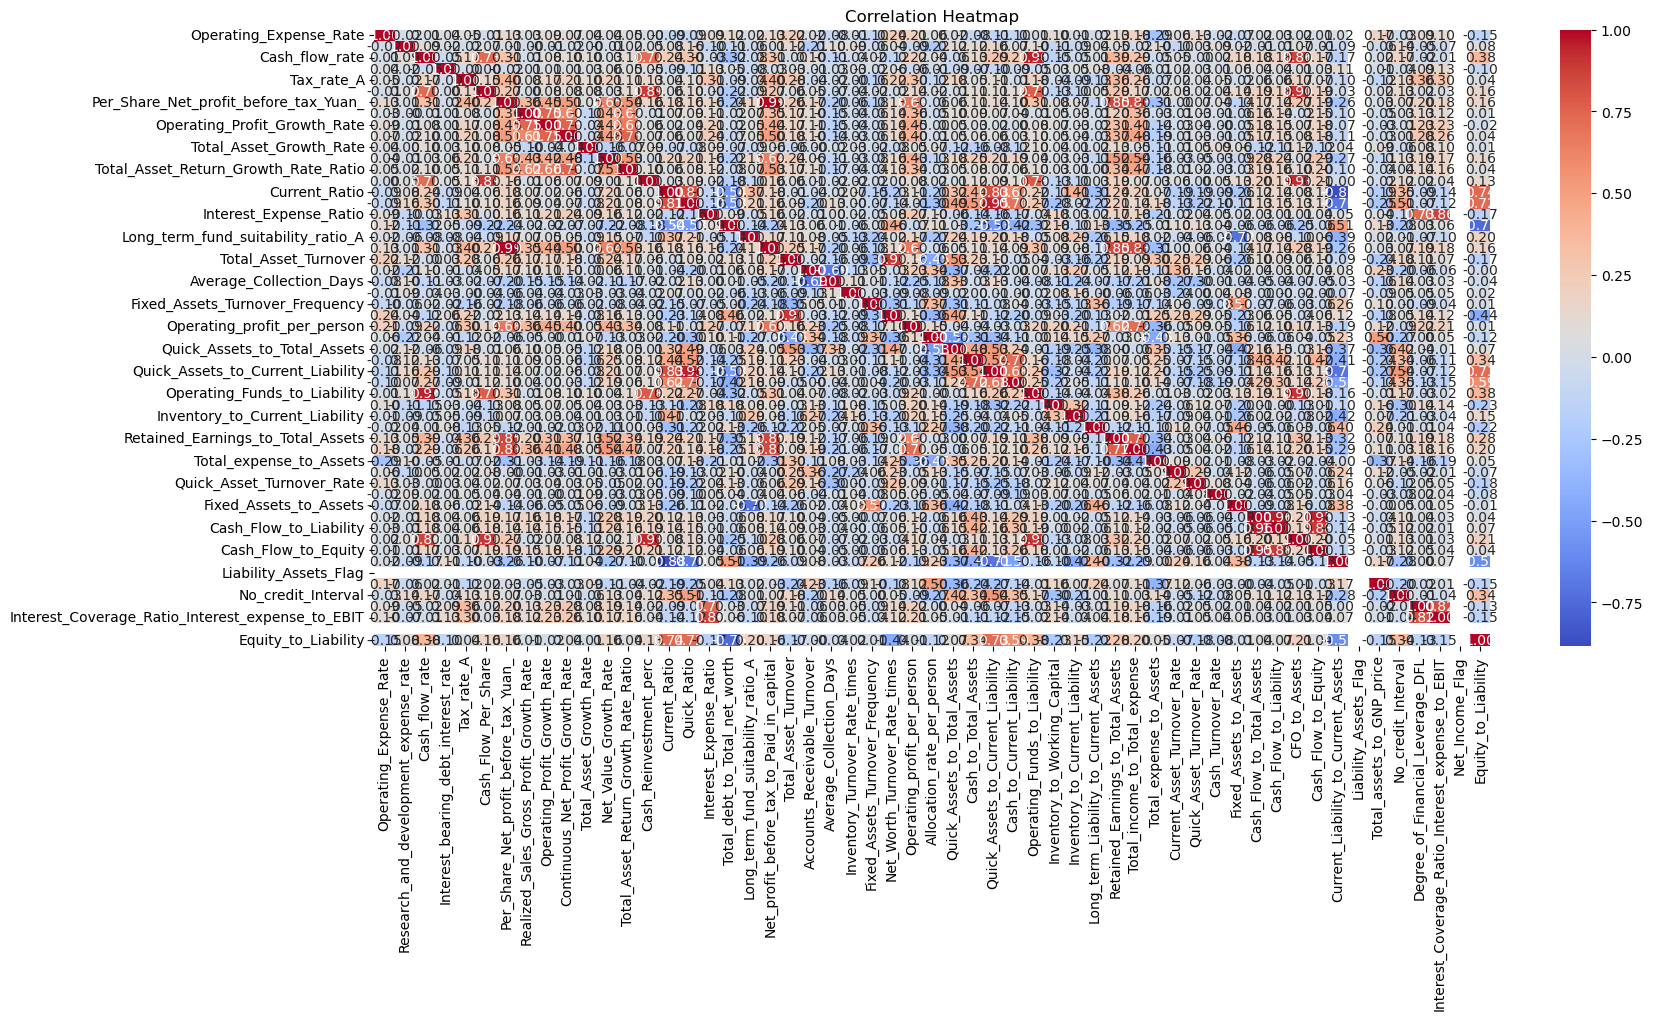

In [26]:
correlation_matrix = df_x.corr()
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


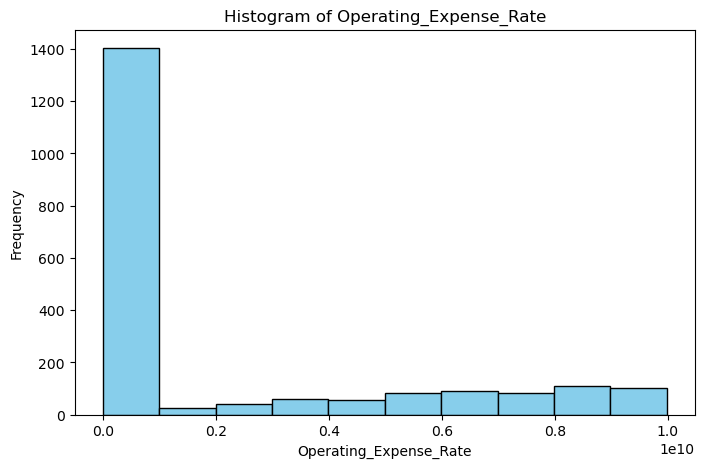

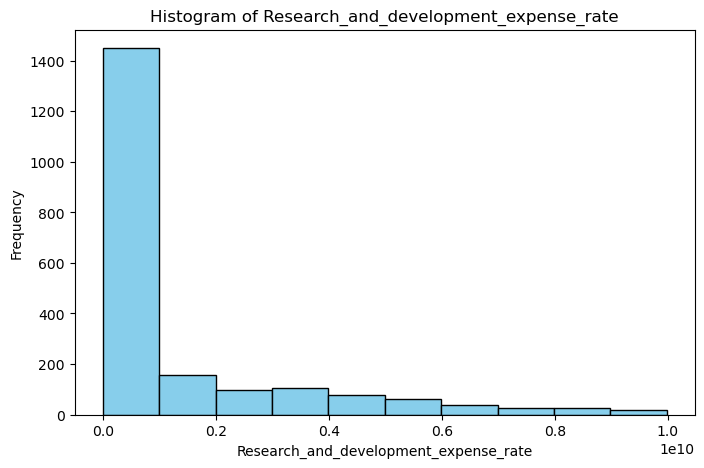

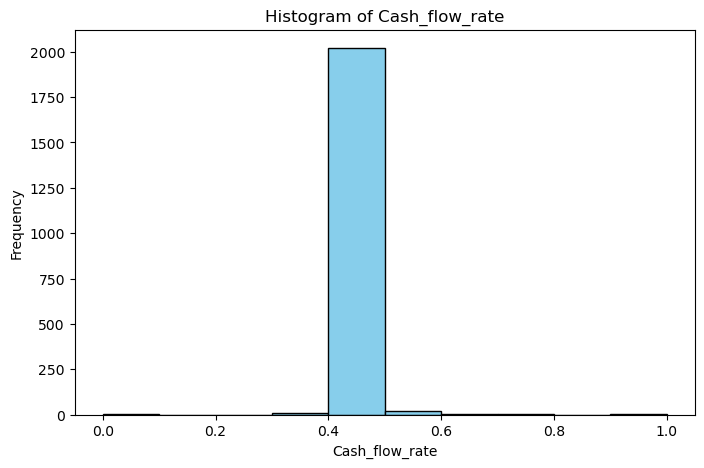

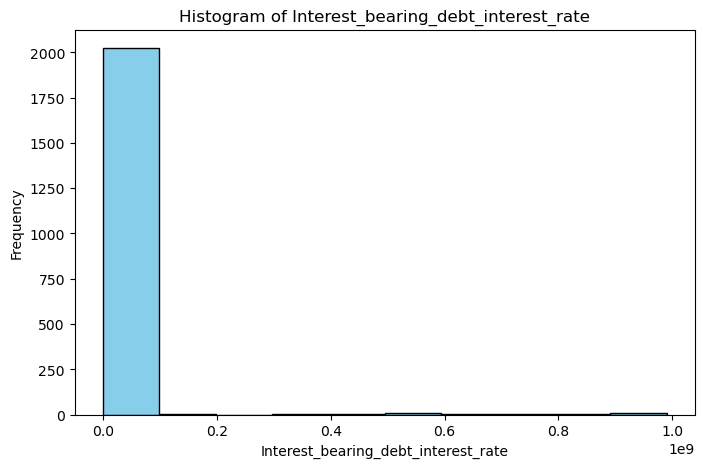

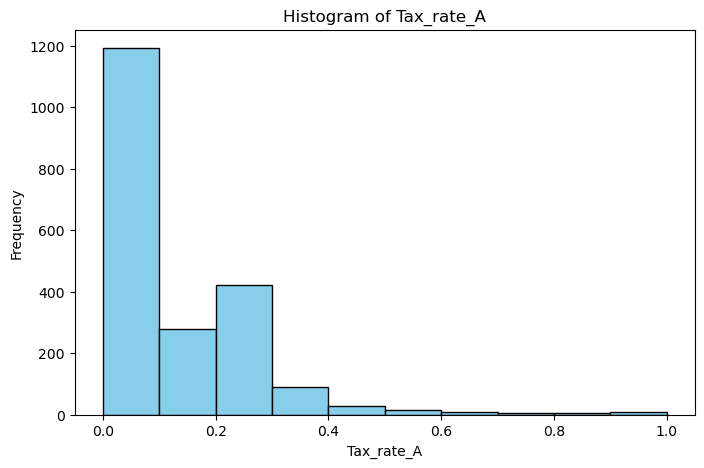

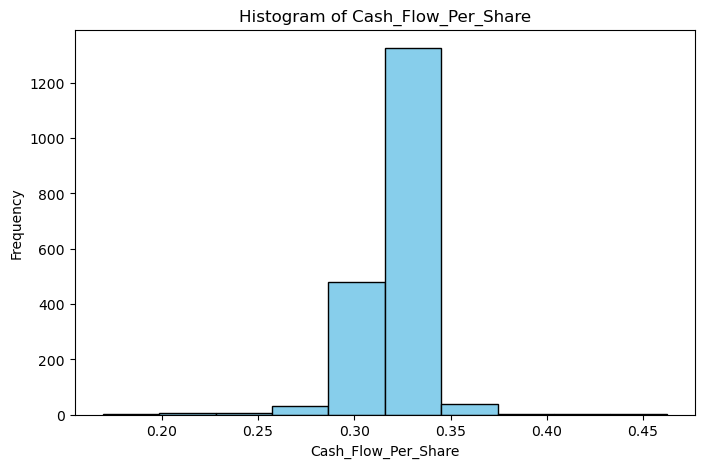

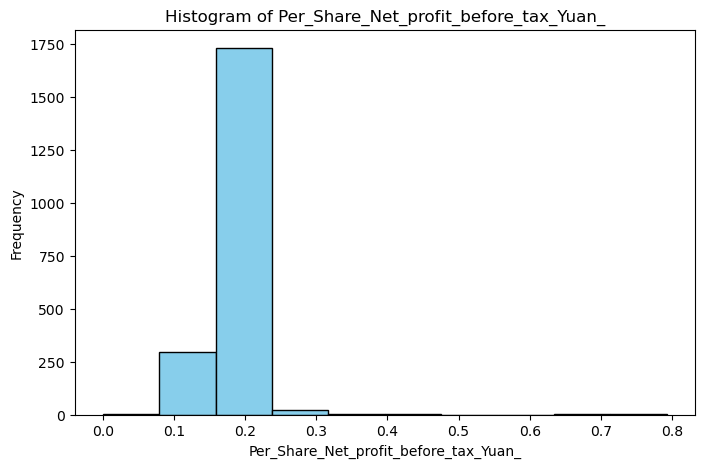

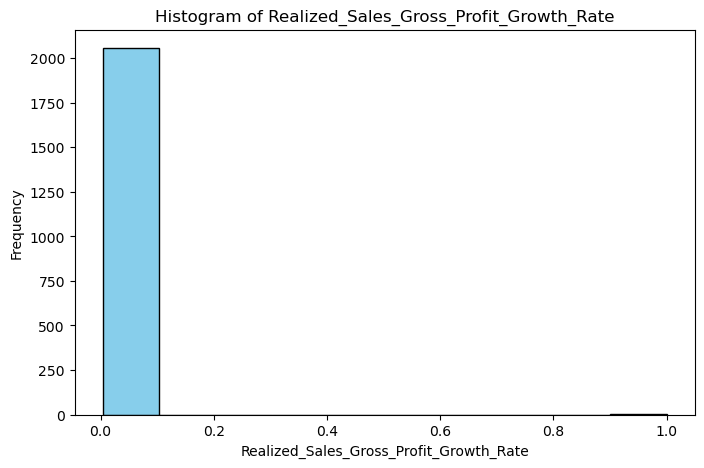

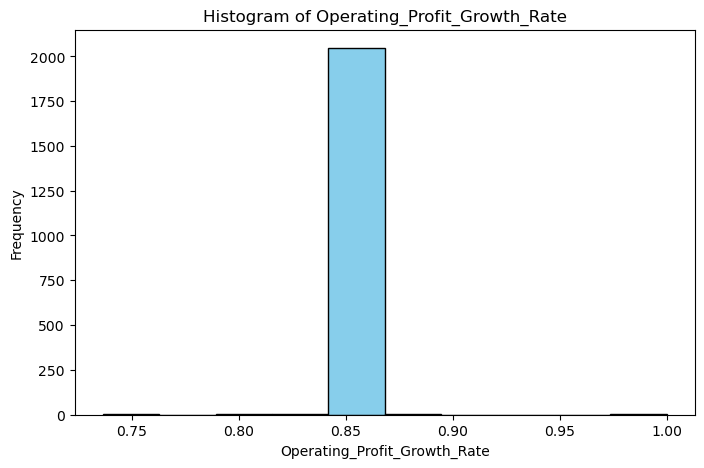

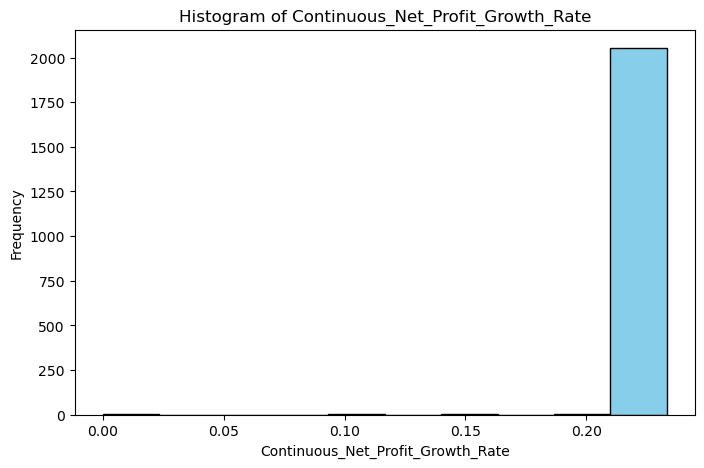

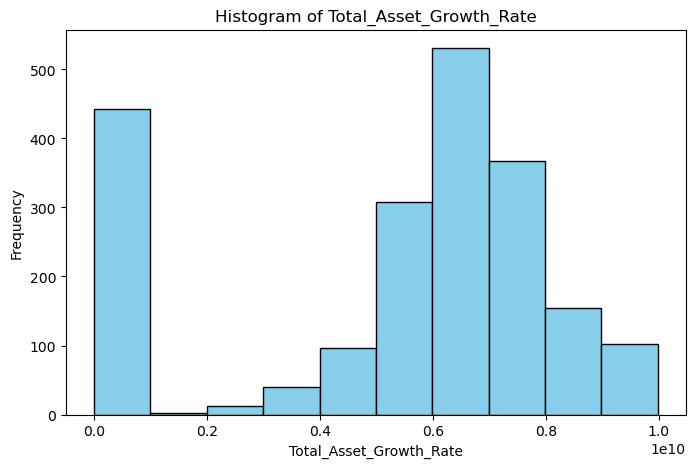

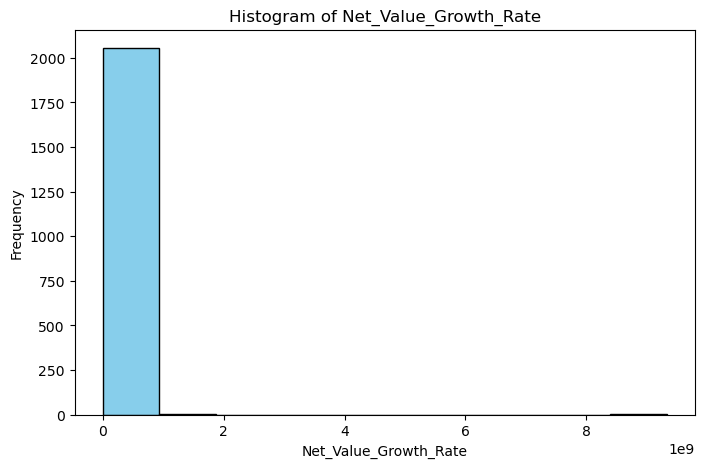

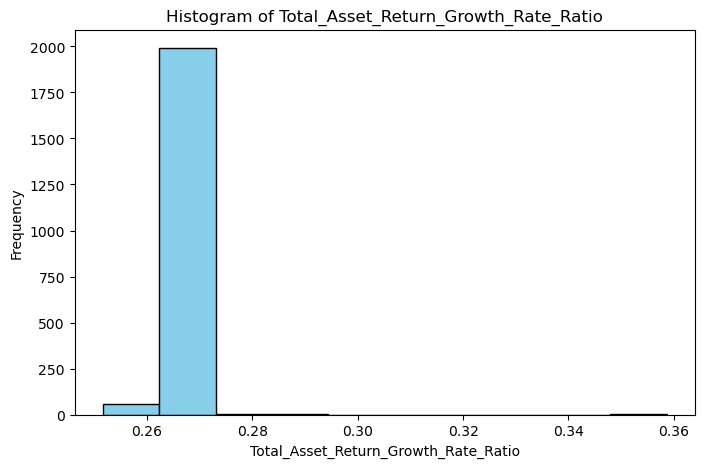

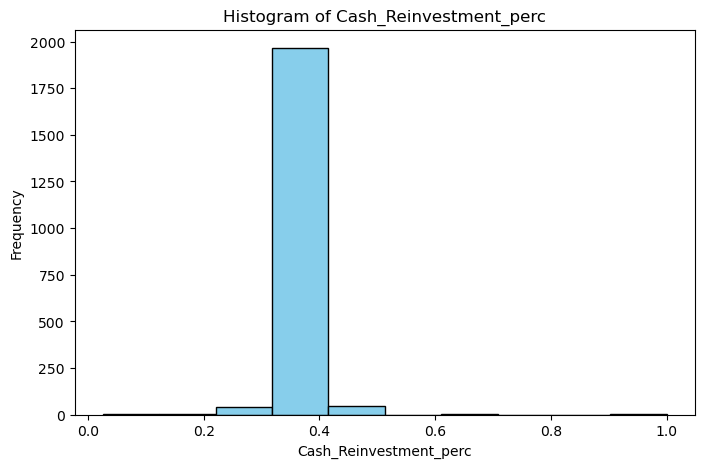

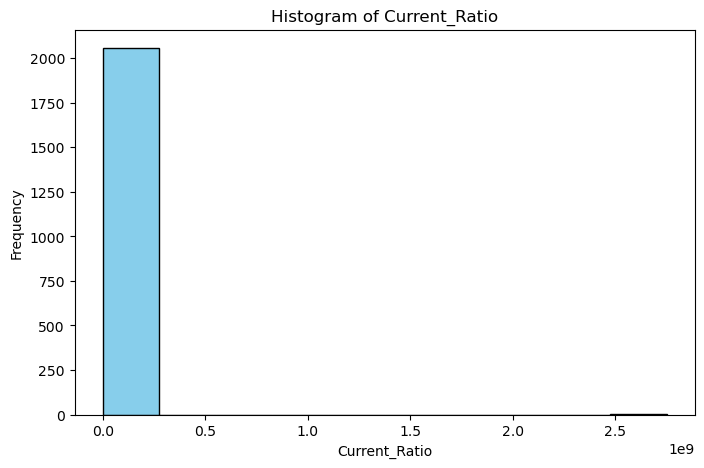

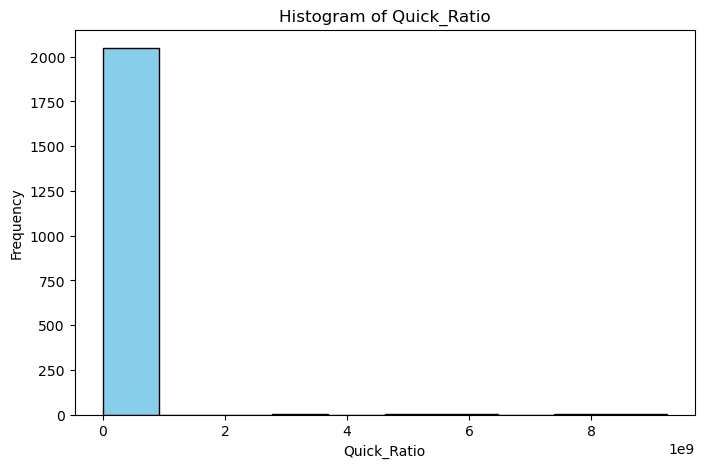

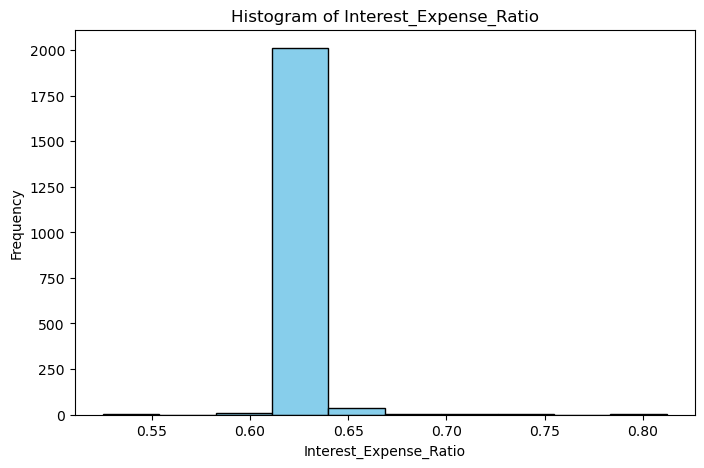

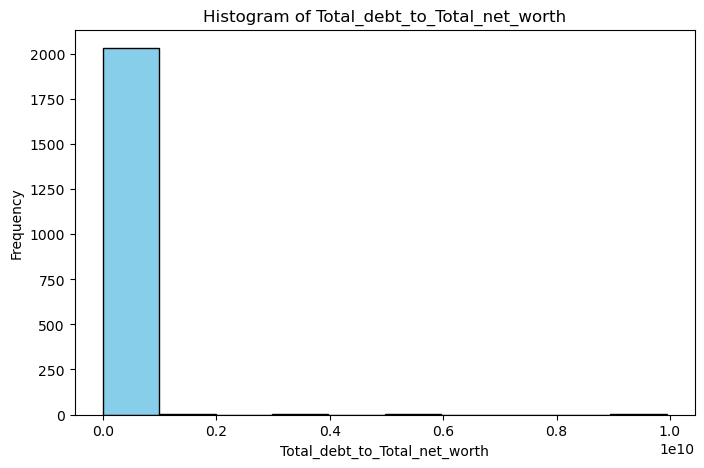

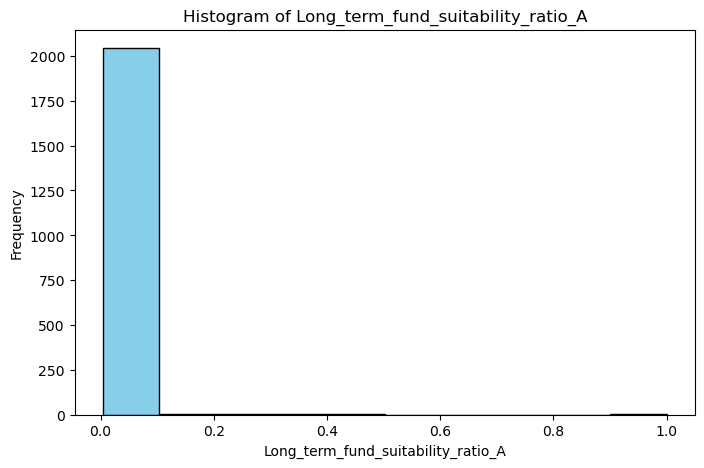

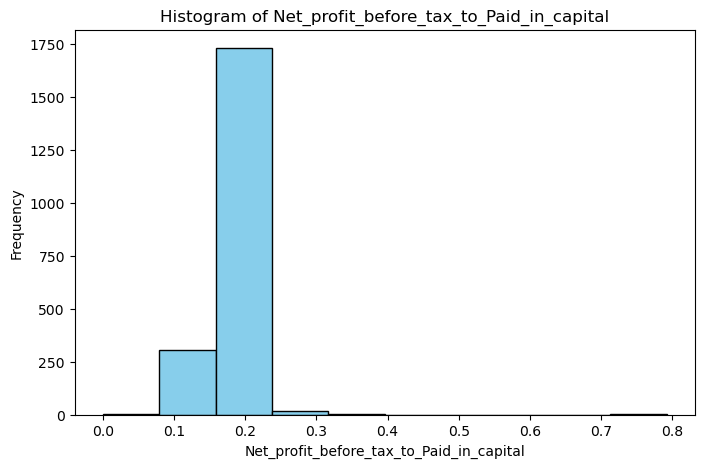

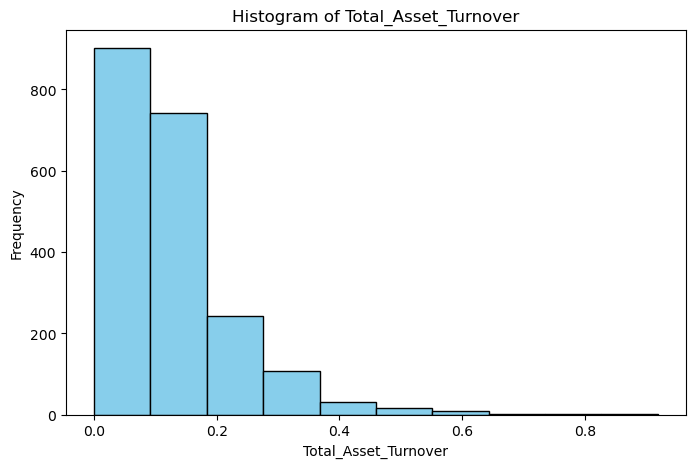

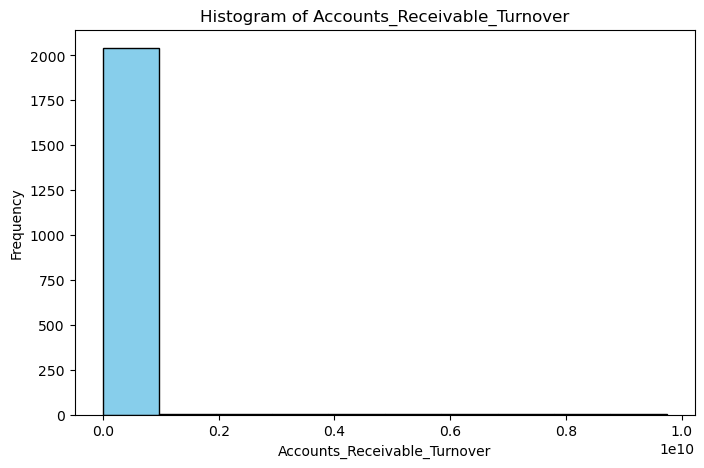

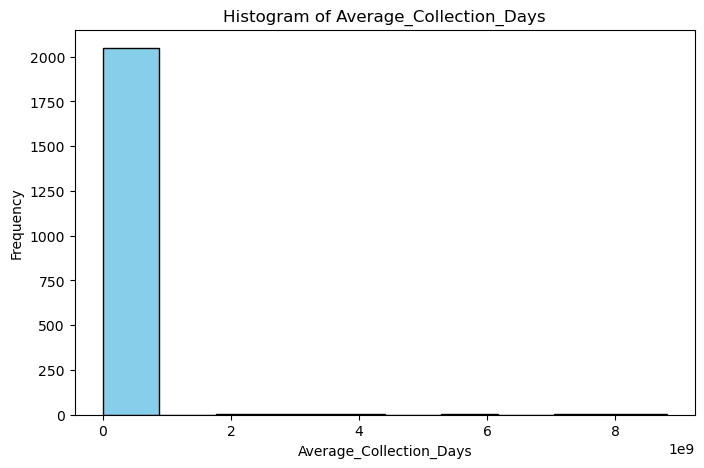

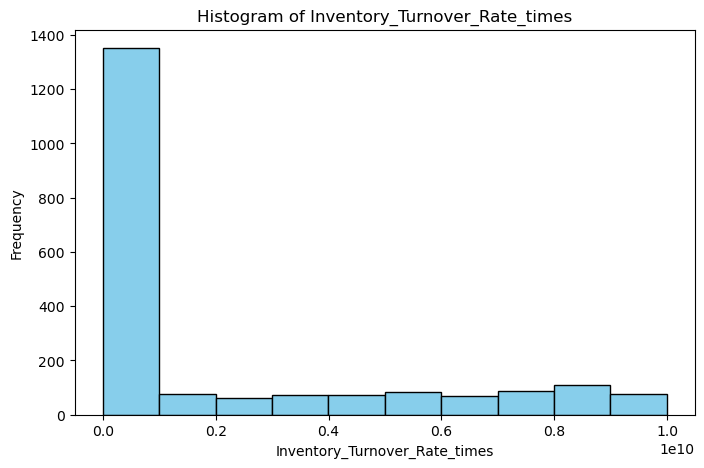

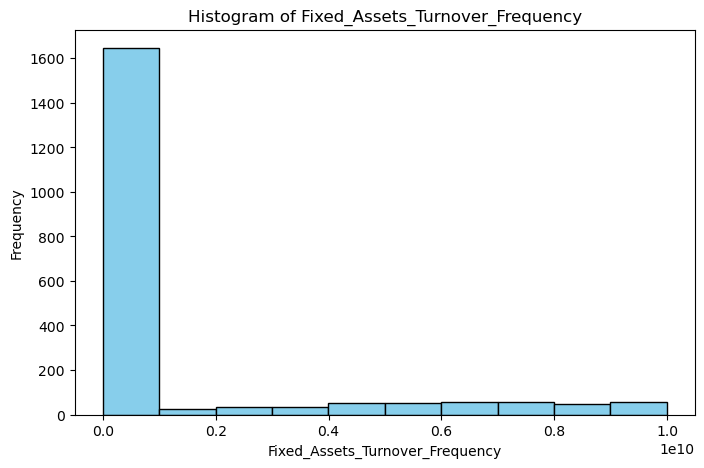

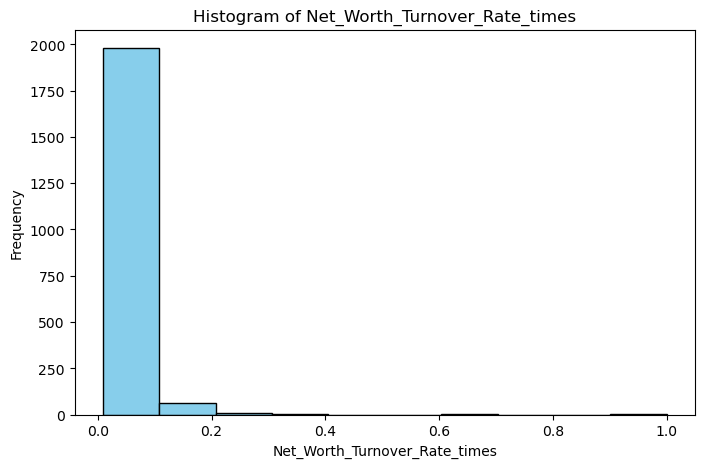

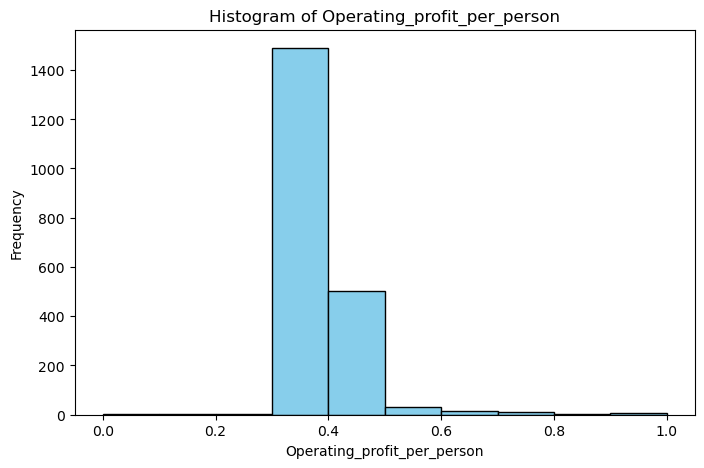

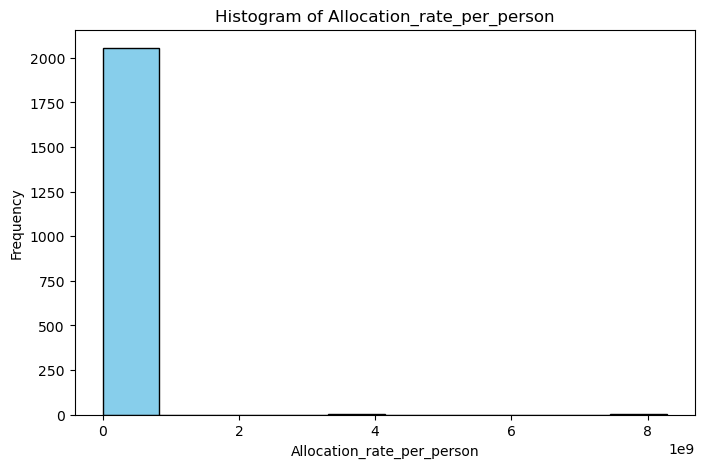

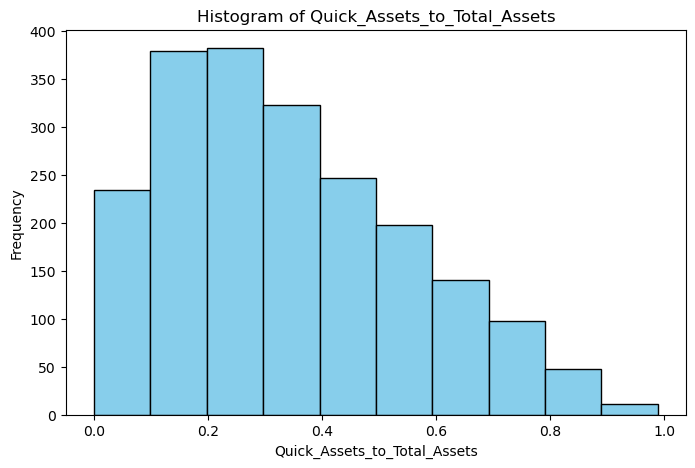

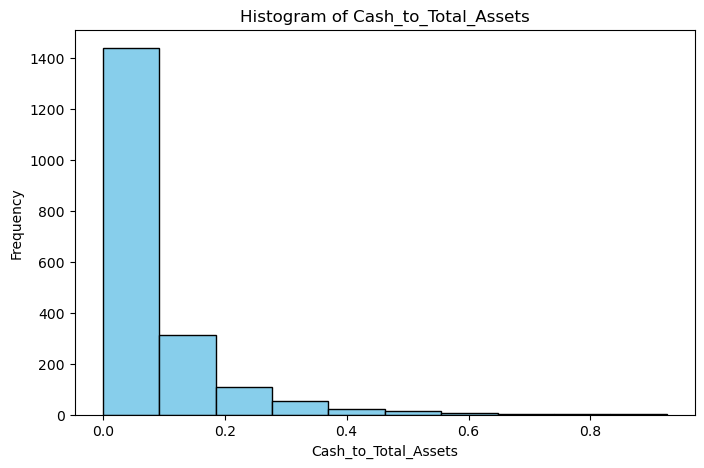

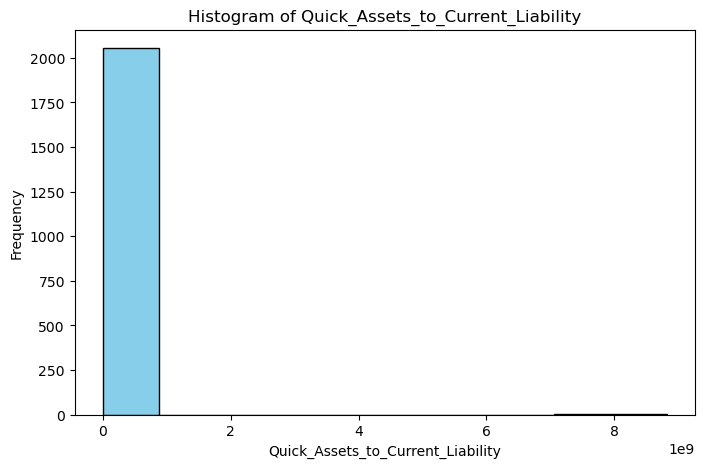

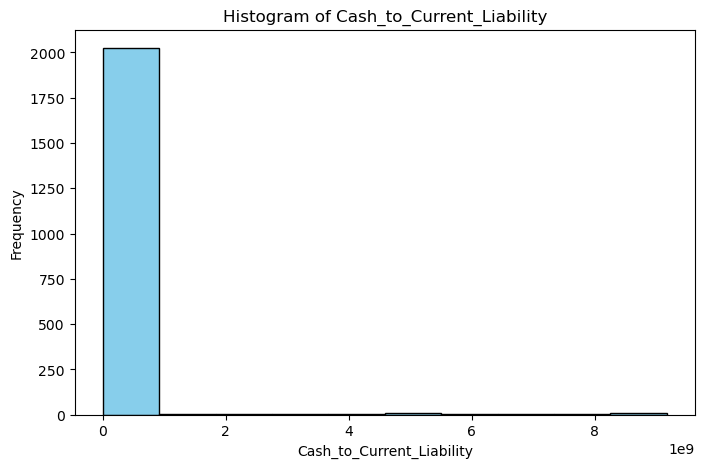

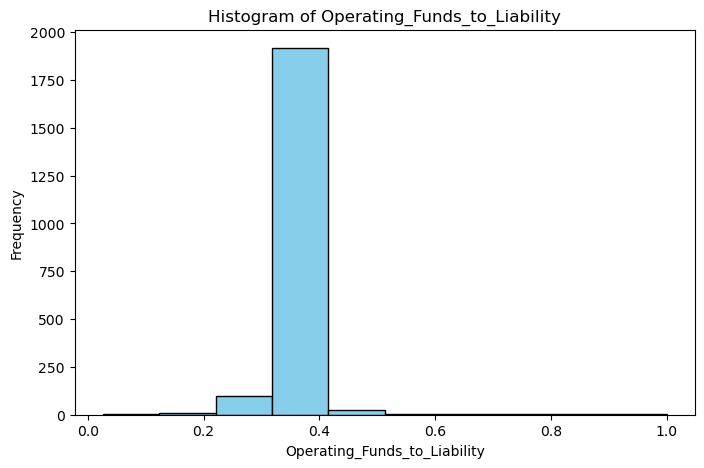

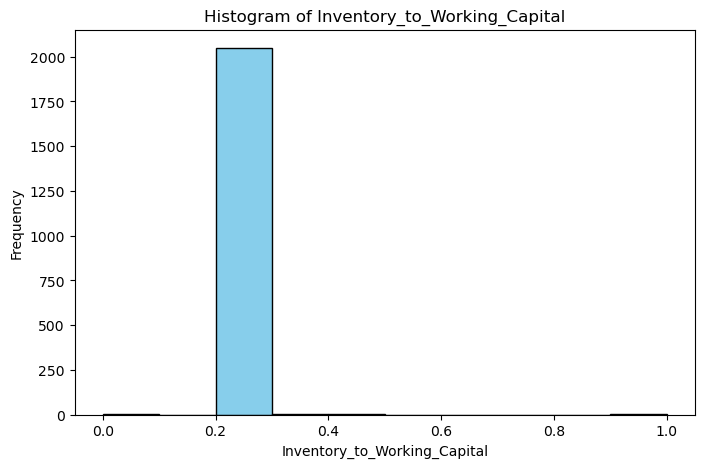

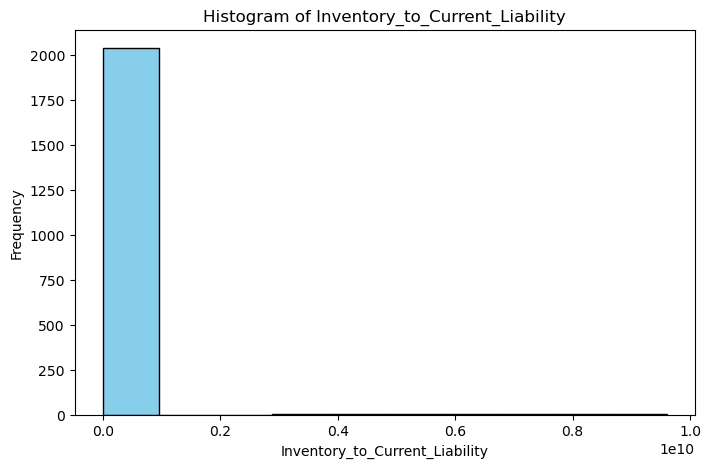

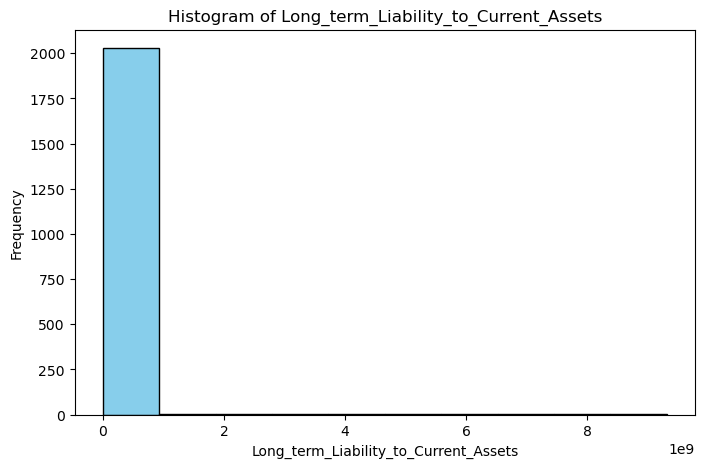

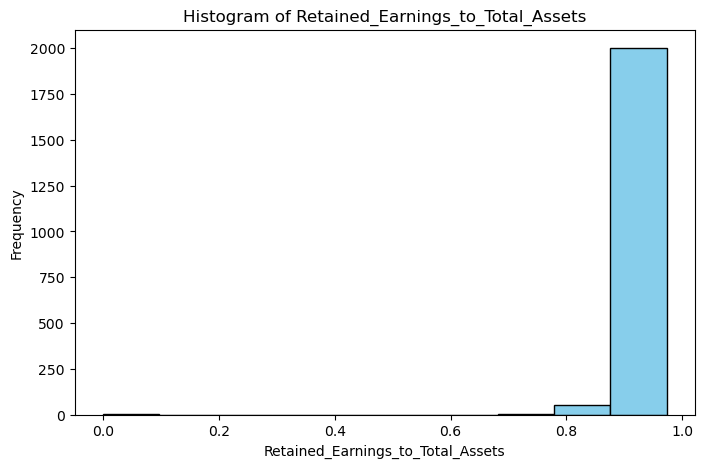

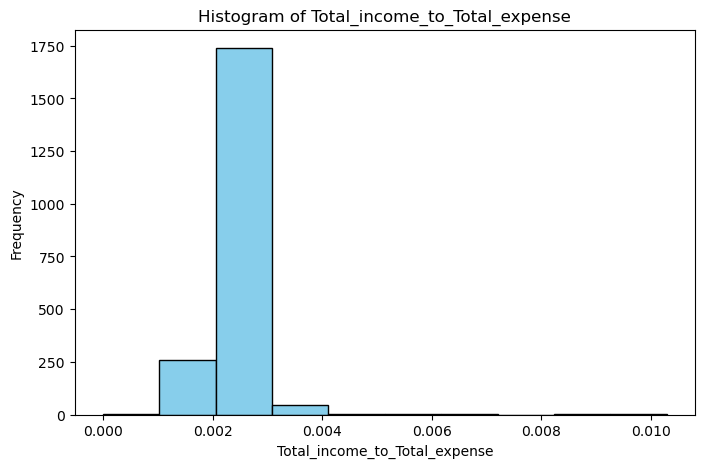

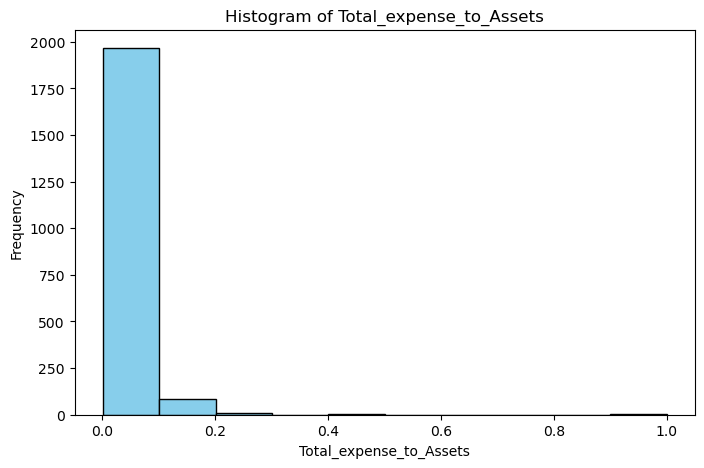

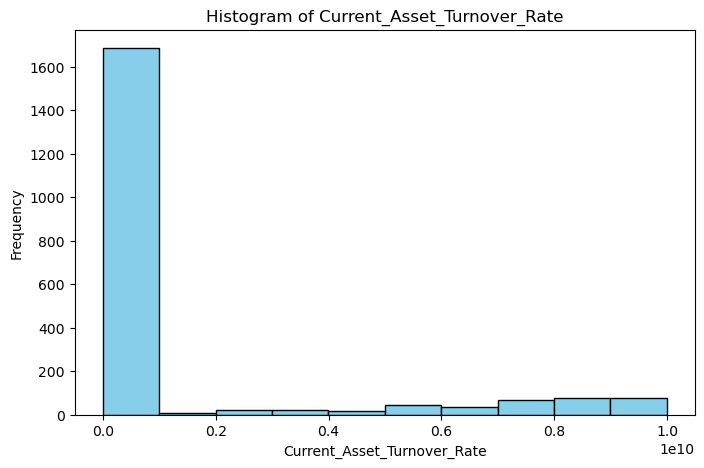

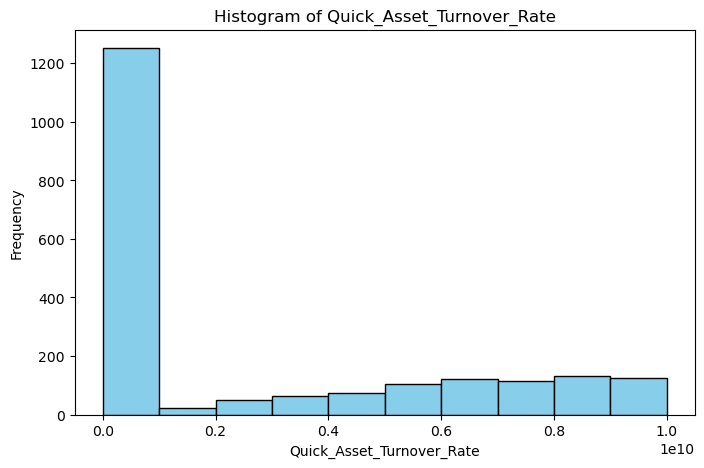

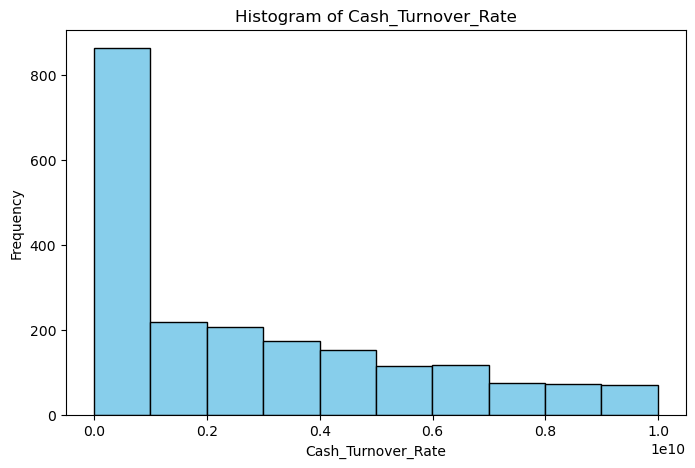

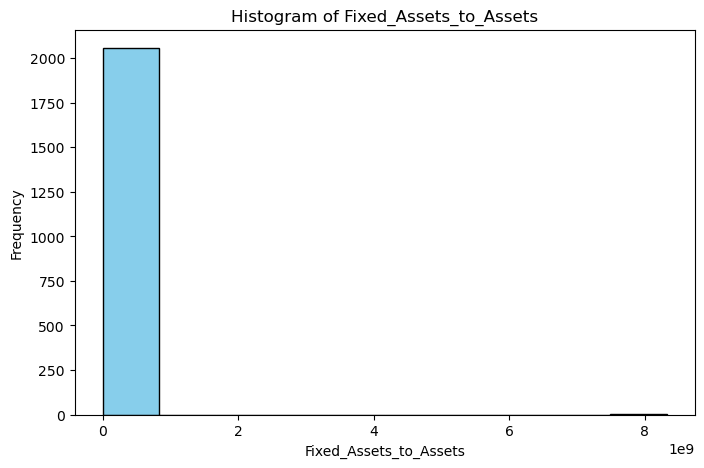

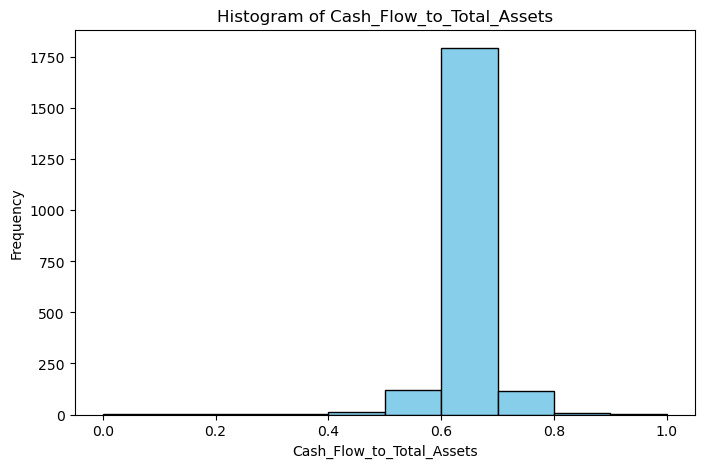

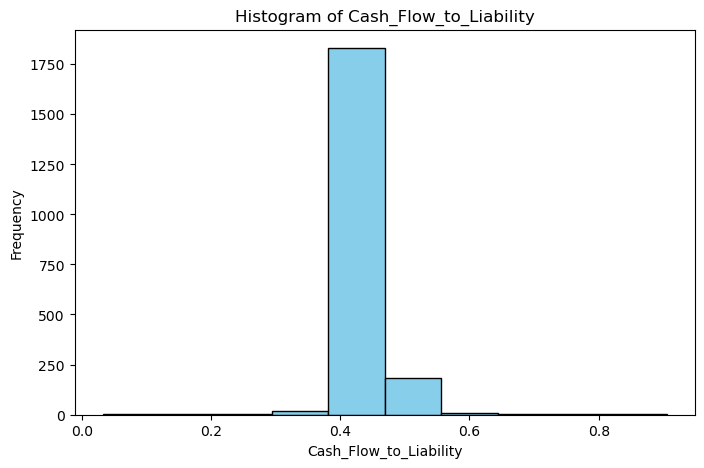

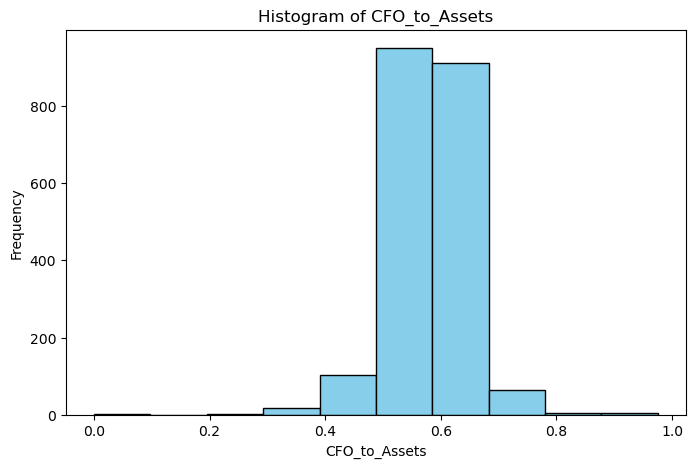

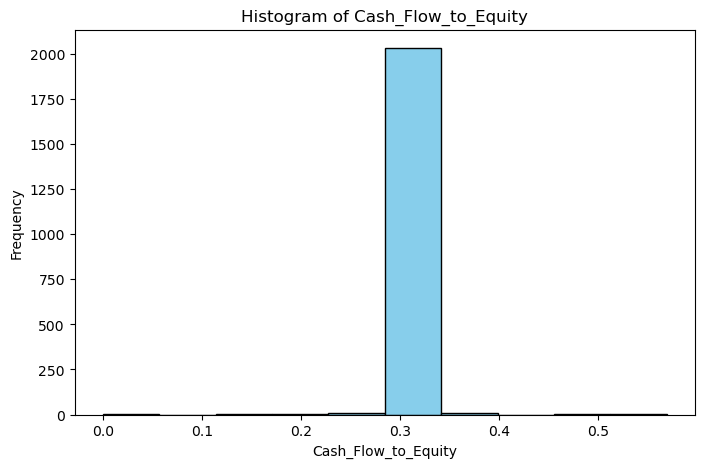

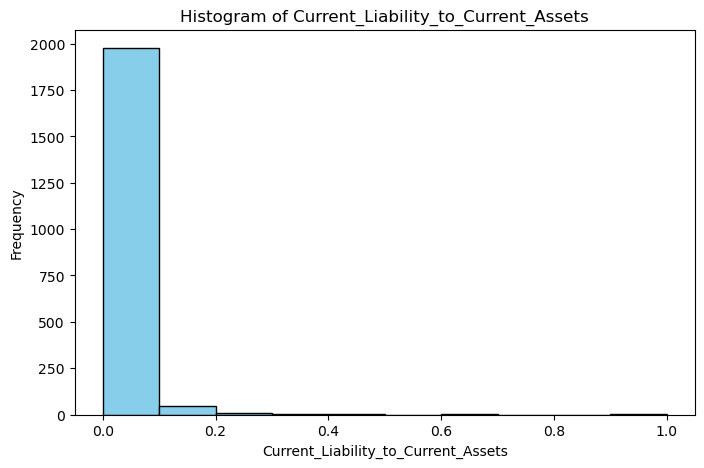

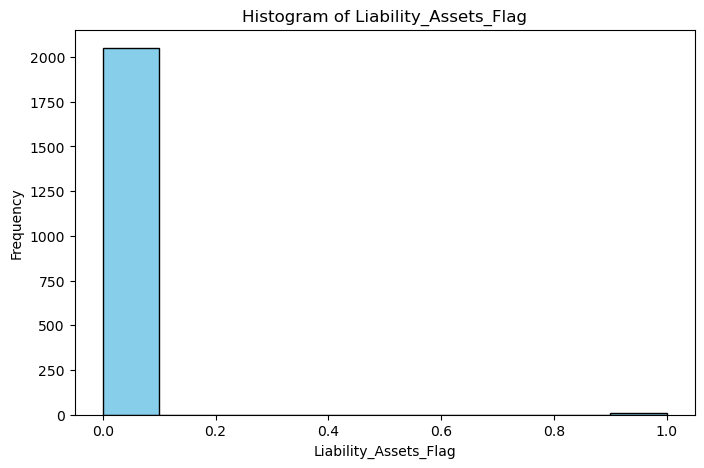

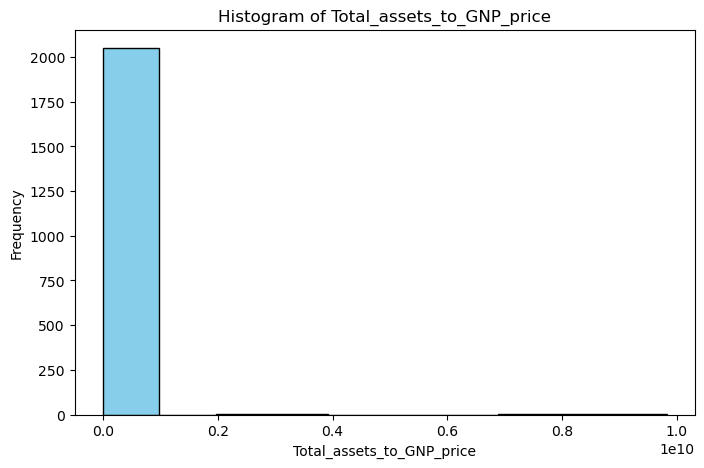

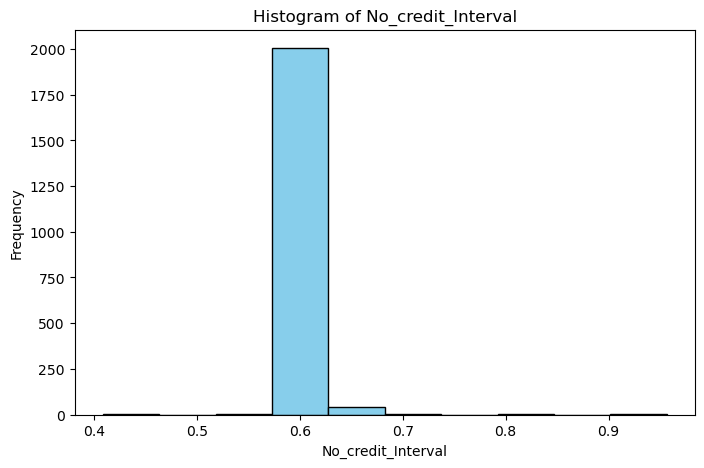

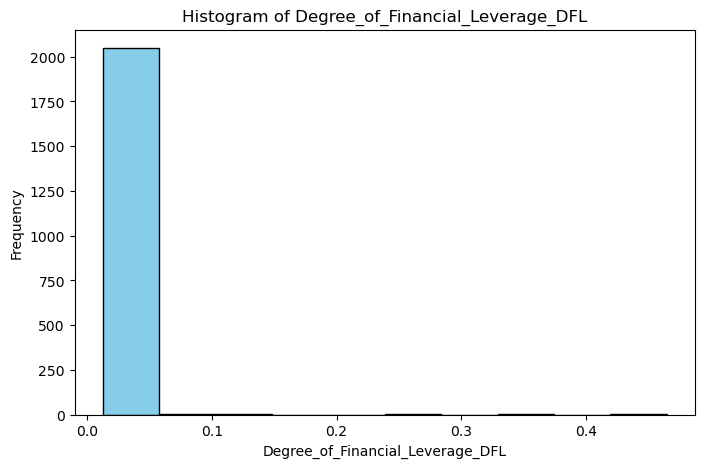

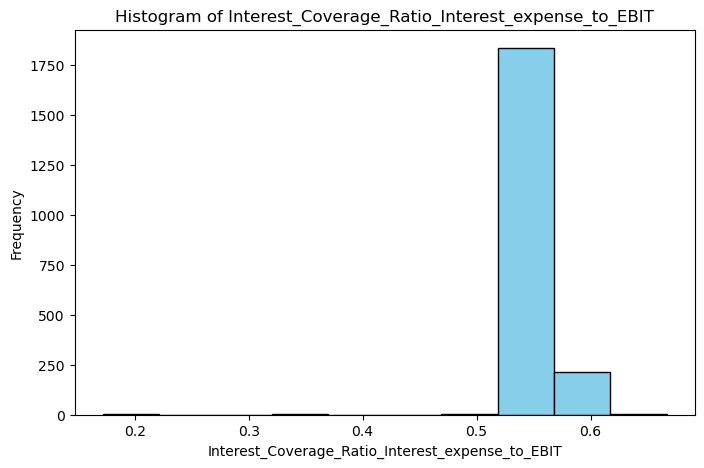

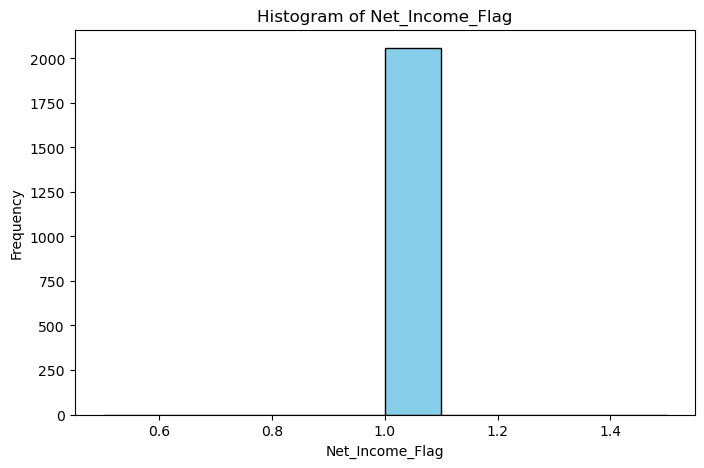

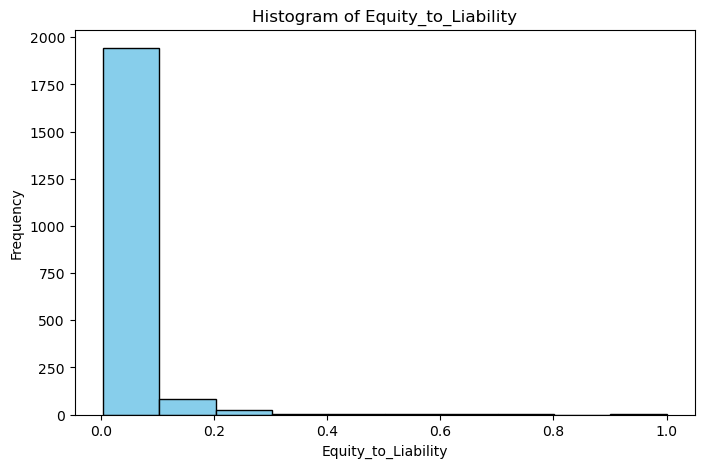

In [27]:
for column in df_x:
    plt.figure(figsize=(8, 5))
    plt.hist(df[column], color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [29]:
X = df_x.copy()
f = calc_vif(X).sort_values(by = 'VIF', ascending = False)
f

variables         VIF
6              Per_Share_Net_profit_before_tax_Yuan_  100.447405
19          Net_profit_before_tax_to_Paid_in_capital   99.819374
43                         Cash_Flow_to_Total_Assets   44.520678
45                                     CFO_to_Assets   29.024719
32                      Operating_Funds_to_Liability   21.595290
30                 Quick_Assets_to_Current_Liability   19.822146
44                            Cash_Flow_to_Liability   17.862861
2                                     Cash_flow_rate   16.462240
46                               Cash_Flow_to_Equity   15.115314
25                     Net_Worth_Turnover_Rate_times   15.057760
14                                     Current_Ratio   14.698454
20                              Total_Asset_Turnover   14.131438
13                            Cash_Reinvestment_perc   13.235082
15                                       Quick_Ratio   12.532200
47               Current_Liability_to_Current_Assets    8.028435
5                                Cash_Flow_Per_Share    6.409400
54                               Equity_to_Liability    6.224938
28                      Quick_Assets_to_Total_Assets    6.137565
52  Interest_Coverage_Ratio_Interest_expense_to_EBIT    6.092737
36                 Retained_Earnings_to_Total_Assets    5.246047
37                     Total_income_to_Total_expense    5.245215
42                            Fixed_Assets_to_Assets    4.782936
17                     Total_debt_to_Total_net_worth    4.712830
16                            Interest_Expense_Ratio    4.579524
31                         Cash_to_Current_Liability    4.208787
8                       Operating_Profit_Growth_Rate    3.653110
29                              Cash_to_Total_Assets    3.499764
9                  Continuous_Net_Profit_Growth_Rate    3.450213
51                  Degree_of_Financial_Leverage_DFL    3.370971
34                    Inventory_to_Current_Liability    3.293475
12              Total_Asset_Return_Growth_Rate_Ratio    3.209797
26                       Operating_profit_per_person    3.043729
18                Long_term_fund_suitability_ratio_A    2.931332
7            Realized_Sales_Gross_Profit_Growth_Rate    2.801434
27                        Allocation_rate_per_person    2.748911
11                             Net_Value_Growth_Rate    2.726603
21                      Accounts_Receivable_Turnover    2.689869
22                           Average_Collection_Days    2.588346
38                           Total_expense_to_Assets    2.302202
24                   Fixed_Assets_Turnover_Frequency    1.929063
35             Long_term_Liability_to_Current_Assets    1.788463
49                         Total_assets_to_GNP_price    1.731263
50                                No_credit_Interval    1.730320
33                      Inventory_to_Working_Capital    1.653534
39                       Current_Asset_Turnover_Rate    1.652959
4                                         Tax_rate_A    1.608102
40                         Quick_Asset_Turnover_Rate    1.416536
0                             Operating_Expense_Rate    1.327792
23                     Inventory_Turnover_Rate_times    1.226866
1              Research_and_development_expense_rate    1.210092
10                           Total_Asset_Growth_Rate    1.189497
3                Interest_bearing_debt_interest_rate    1.131387
41                                Cash_Turnover_Rate    1.118740
53                                   Net_Income_Flag    0.000000
48                             Liability_Assets_Flag         NaN

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = pd.DataFrame(sc.fit_transform(df_x), columns=df_x.columns)
scaled_x.shape
scaled_x.head()


Operating_Expense_Rate  Research_and_development_expense_rate  \
0                2.081168                              -0.645151   
1                2.253378                               2.037441   
2                0.537423                              -0.080941   
3                1.349273                              -0.645151   
4                0.500521                              -0.645151   

   Cash_flow_rate  Interest_bearing_debt_interest_rate  Tax_rate_A  \
0       -0.317865                            -0.446124   -0.808710   
1       -0.576641                             0.782533   -0.819217   
2       -1.947928                             0.039939   -0.819217   
3       -0.225831                             0.363978   -0.750170   
4       -0.174075                             1.005309    2.148302   

   Cash_Flow_Per_Share  Per_Share_Net_profit_before_tax_Yuan_  \
0             0.231832                               1.002425   
1            -0.546810                              -0.818271   
2            -2.132952                              -0.212764   
3            -0.069452                              -0.091663   
4             0.513552                               0.008559   

   Realized_Sales_Gross_Profit_Growth_Rate  Operating_Profit_Growth_Rate  \
0                                -0.380838                     -0.174830   
1                                -2.054917                     -1.982285   
2                                 0.822255                      1.052825   
3                                 1.957608                      1.958614   
4                                -0.402660                     -0.414981   

   Continuous_Net_Profit_Growth_Rate  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
0                          -0.107992  ...      -0.070769            -0.978342   
1                          -1.913351  ...      -0.546802            -0.033212   
2                          -0.475233  ...      -2.208537             0.019412   
3                           1.425888  ...      -0.064329             0.585073   
4                          -0.135202  ...       0.251674             0.779334   

   Current_Liability_to_Current_Assets  Liability_Assets_Flag  \
0                             0.013917                    0.0   
1                             0.388455                    0.0   
2                            -0.061295                    0.0   
3                            -1.007908                    0.0   
4                            -0.009210                    0.0   

   Total_assets_to_GNP_price  No_credit_Interval  \
0                   2.154084           -1.808624   
1                   0.250468           -1.467698   
2                  -0.724406            0.135358   
3                  -0.216687           -0.885015   
4                   0.327711            1.003294   

   Degree_of_Financial_Leverage_DFL  \
0                          0.125697   
1                         -1.752663   
2                          1.340167   
3                          0.328434   
4                          1.809723   

   Interest_Coverage_Ratio_Interest_expense_to_EBIT  Net_Income_Flag  \
0                                          0.100239              0.0   
1                                         -1.766668              0.0   
2                                          0.949389              0.0   
3                                          0.274603              0.0   
4                                          1.317575              0.0   

   Equity_to_Liability  
0            -1.013377  
1            -0.285305  
2             0.348129  
3            -0.413759  
4            -0.777908  

[5 rows x 55 columns]

In [31]:
from scipy.stats import zscore                                       
from sklearn.preprocessing import StandardScaler                      
from sklearn.preprocessing import MinMaxScaler                       
from sklearn.linear_model import LogisticRegression                  
from sklearn import metrics, model_selection                          
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV    

In [32]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, df_y,test_size = 0.33, random_state=42)

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as sm

In [34]:
LogR = LogisticRegression()

In [35]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [36]:
selector = selector.fit(X_train, y_train)

In [37]:
selector.n_features_

15

In [38]:
rank = pd.DataFrame({'Feature': X_train.columns, 'Rank': selector.ranking_})
rank[rank['Rank'] == 1]

Feature  Rank
1   Research_and_development_expense_rate     1
3     Interest_bearing_debt_interest_rate     1
11                  Net_Value_Growth_Rate     1
15                            Quick_Ratio     1
17          Total_debt_to_Total_net_worth     1
21           Accounts_Receivable_Turnover     1
26            Operating_profit_per_person     1
27             Allocation_rate_per_person     1
30      Quick_Assets_to_Current_Liability     1
32           Operating_Funds_to_Liability     1
36      Retained_Earnings_to_Total_Assets     1
37          Total_income_to_Total_expense     1
38                Total_expense_to_Assets     1
45                          CFO_to_Assets     1
54                    Equity_to_Liability     1

In [39]:
# List of variables to keep
variables_to_keep = ['Research_and_development_expense_rate',
'Interest_bearing_debt_interest_rate',
'Net_Value_Growth_Rate',
'Quick_Ratio',
'Total_debt_to_Total_net_worth',
'Accounts_Receivable_Turnover',
'Operating_profit_per_person',
'Allocation_rate_per_person',
'Quick_Assets_to_Current_Liability',
'Operating_Funds_to_Liability',
'Retained_Earnings_to_Total_Assets',
'Total_income_to_Total_expense',
'Total_expense_to_Assets',
'CFO_to_Assets',
'Equity_to_Liability']

df_model = scaled_x.drop(columns=[col for col in scaled_x.columns if col not in variables_to_keep])




In [40]:
df_model

Research_and_development_expense_rate  \
0                                 -0.645151   
1                                  2.037441   
2                                 -0.080941   
3                                 -0.645151   
4                                 -0.645151   
...                                     ...   
2053                               2.037441   
2054                              -0.645151   
2055                               2.037441   
2056                              -0.645151   
2057                              -0.645151   

      Interest_bearing_debt_interest_rate  Net_Value_Growth_Rate  Quick_Ratio  \
0                               -0.446124              -0.414031    -1.258540   
1                                0.782533              -1.125649    -0.372934   
2                                0.039939              -0.219738    -0.153178   
3                                0.363978              -0.283396    -0.968701   
4                                1.005309              -0.164955    -0.533211   
...                                   ...                    ...          ...   
2053                            -1.634274               0.115489     2.176822   
2054                             0.586757              -0.410748     0.205768   
2055                             0.060190              -1.035763    -0.169145   
2056                             0.316723              -0.803085     0.375552   
2057                             1.153830               1.936699    -0.714208   

      Total_debt_to_Total_net_worth  Accounts_Receivable_Turnover  \
0                          2.374795                      2.019729   
1                         -0.358592                     -1.156348   
2                         -0.744160                     -0.426261   
3                         -0.211326                      2.019729   
4                          0.618119                     -0.654915   
...                             ...                           ...   
2053                      -1.230113                     -0.660932   
2054                      -0.911036                     -0.717092   
2055                      -0.923113                     -1.126262   
2056                      -0.946229                     -0.422250   
2057                       0.546433                     -0.261791   

      Operating_profit_per_person  Allocation_rate_per_person  \
0                        1.894737                    2.194950   
1                       -0.957635                    0.320999   
2                       -0.293970                   -0.298004   
3                        1.894737                   -0.494127   
4                       -0.343717                   -0.907697   
...                           ...                         ...   
2053                     0.169577                   -0.506526   
2054                    -0.315452                    0.111202   
2055                    -1.907483                    1.121393   
2056                     0.830980                    1.336261   
2057                    -0.092723                   -0.988007   

      Quick_Assets_to_Current_Liability  Operating_Funds_to_Liability  \
0                             -1.110511                     -0.261711   
1                             -0.137347                     -0.577088   
2                             -0.232092                     -2.144415   
3                             -0.932606                     -0.190581   
4                             -0.005724                     -0.043261   
...                                 ...                           ...   
2053                           2.166055                      2.074039   
2054                           0.149797                      0.145795   
2055                          -0.069073                      1.868061   
2056                           0.252905                      1.040270   
2057                          -0.702104                

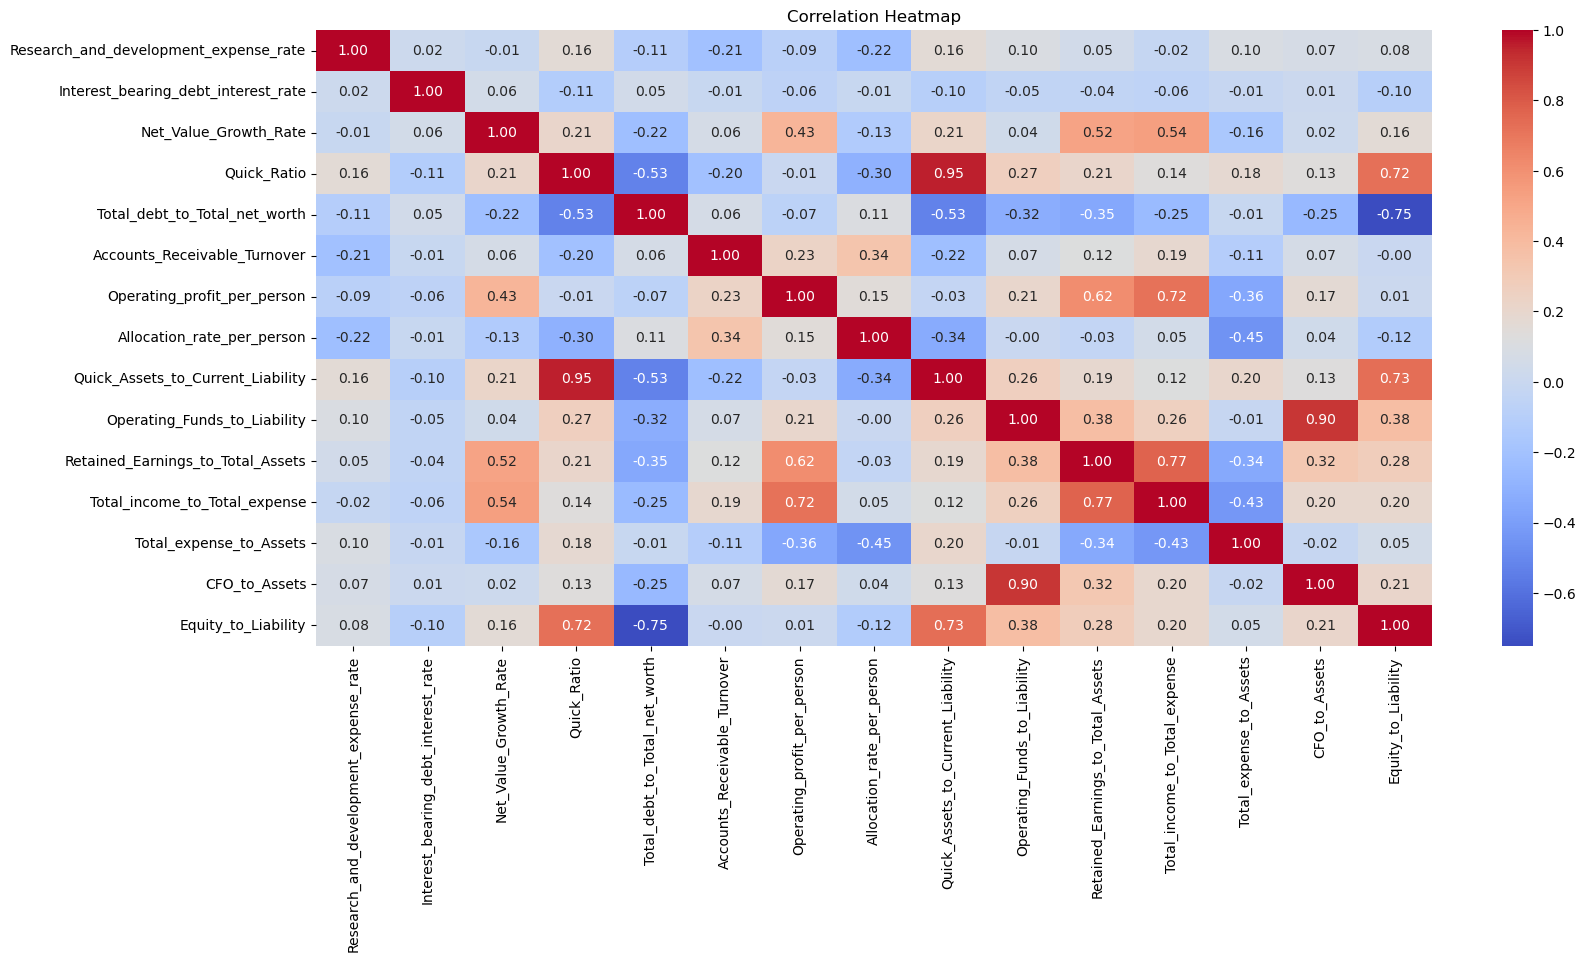

In [41]:
correlation_matrix = df_model.corr()
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(z):
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]

    return(vif)

In [43]:
z = df_model.copy()
f = calc_vif(z).sort_values(by = 'VIF', ascending = False)
f

variables        VIF
8       Quick_Assets_to_Current_Liability  11.876396
3                             Quick_Ratio  11.155503
9            Operating_Funds_to_Liability   7.751663
13                          CFO_to_Assets   6.757685
14                    Equity_to_Liability   4.527701
11          Total_income_to_Total_expense   3.645826
10      Retained_Earnings_to_Total_Assets   3.110853
4           Total_debt_to_Total_net_worth   2.672159
6             Operating_profit_per_person   2.351906
12                Total_expense_to_Assets   1.750750
7              Allocation_rate_per_person   1.680246
2                   Net_Value_Growth_Rate   1.664615
5            Accounts_Receivable_Turnover   1.345794
0   Research_and_development_expense_rate   1.106304
1     Interest_bearing_debt_interest_rate   1.048720

In [44]:
df_model.drop(columns=['Quick_Assets_to_Current_Liability'], inplace=True)

In [45]:
z = df_model.copy()
f = calc_vif(z).sort_values(by = 'VIF', ascending = False)
f

variables       VIF
8            Operating_Funds_to_Liability  7.751444
12                          CFO_to_Assets  6.756234
13                    Equity_to_Liability  4.355025
10          Total_income_to_Total_expense  3.645422
9       Retained_Earnings_to_Total_Assets  3.105719
4           Total_debt_to_Total_net_worth  2.668033
3                             Quick_Ratio  2.566141
6             Operating_profit_per_person  2.350607
11                Total_expense_to_Assets  1.748161
7              Allocation_rate_per_person  1.654055
2                   Net_Value_Growth_Rate  1.654050
5            Accounts_Receivable_Turnover  1.333465
0   Research_and_development_expense_rate  1.106047
1     Interest_bearing_debt_interest_rate  1.047936

In [46]:
df_model.drop(columns=['Operating_Funds_to_Liability'], inplace=True)

In [47]:
z = df_model.copy()
f = calc_vif(z).sort_values(by = 'VIF', ascending = False)
f

variables       VIF
12                    Equity_to_Liability  3.787268
9           Total_income_to_Total_expense  3.642685
8       Retained_Earnings_to_Total_Assets  3.059408
3                             Quick_Ratio  2.565967
4           Total_debt_to_Total_net_worth  2.544055
6             Operating_profit_per_person  2.339397
10                Total_expense_to_Assets  1.745031
7              Allocation_rate_per_person  1.653720
2                   Net_Value_Growth_Rate  1.628281
5            Accounts_Receivable_Turnover  1.333242
11                          CFO_to_Assets  1.217930
0   Research_and_development_expense_rate  1.102384
1     Interest_bearing_debt_interest_rate  1.042460

In [48]:
grid={'penalty':['l2','none'],'solver':['sag','lbfgs'],'tol':[0.0001,0.00001]}

In [49]:
model = LogisticRegression(max_iter=10000,n_jobs=2)


In [50]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df_model, df_y,test_size = 0.33, random_state=42)

In [52]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]})

In [53]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [54]:
best_model = grid_search.best_estimator_

In [55]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [56]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

In [57]:
best_model.score(X_train, y_train)

0.9201741654571843

In [58]:
best_model.score(X_test, y_test)

0.9191176470588235

In [59]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, ytest_predict).ravel()

In [60]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Accuracy: 0.9191176470588235
Precision: 0.6153846153846154
Recall: 0.47761194029850745
F1 Score: 0.5378151260504201


LDA

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [62]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [63]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

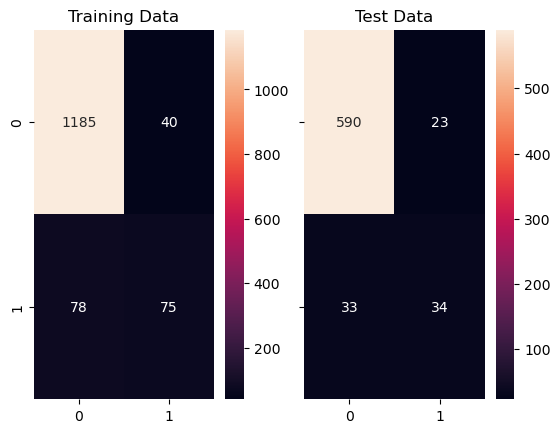

In [64]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [65]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.94      0.97      0.95      1225
           1       0.65      0.49      0.56       153

    accuracy                           0.91      1378
   macro avg       0.80      0.73      0.76      1378
weighted avg       0.91      0.91      0.91      1378
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.95      0.96      0.95       613
           1       0.60      0.51      0.55        67

    accuracy                           0.92       680
   macro avg       0.77      0.73      0.75       680
weighted avg       0.91      0.92      0.91       680
 



In [66]:
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.911
AUC for the Test Data: 0.899


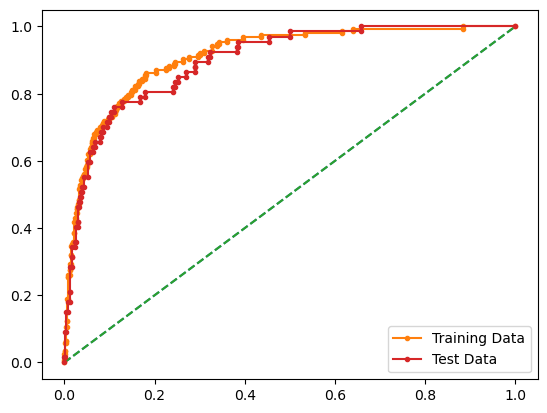

In [67]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [68]:
clf.intercept_ 

array([-3.7115177])

In [69]:
clf.coef_

array([[ 0.57768389,  0.30369903, -0.7046614 , -0.4806465 ,  1.24183467,
        -0.4198081 , -0.03276141,  0.69607189, -0.86396767,  0.08642879,
         0.71083484, -0.26958195,  0.65042886]])

Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9176470588235294
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       613
           1       0.62      0.43      0.51        67

    accuracy                           0.92       680
   macro avg       0.78      0.70      0.73       680
weighted avg       0.91      0.92      0.91       680

Confusion Matrix:
[[595  18]
 [ 38  29]]


In [71]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [72]:
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[1225    0]
 [   0  153]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1225
           1       1.00      1.00      1.00       153

    accuracy                           1.00      1378
   macro avg       1.00      1.00      1.00      1378
weighted avg       1.00      1.00      1.00      1378



In [73]:
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9235294117647059
[[598  15]
 [ 37  30]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       613
           1       0.67      0.45      0.54        67

    accuracy                           0.92       680
   macro avg       0.80      0.71      0.75       680
weighted avg       0.91      0.92      0.92       680



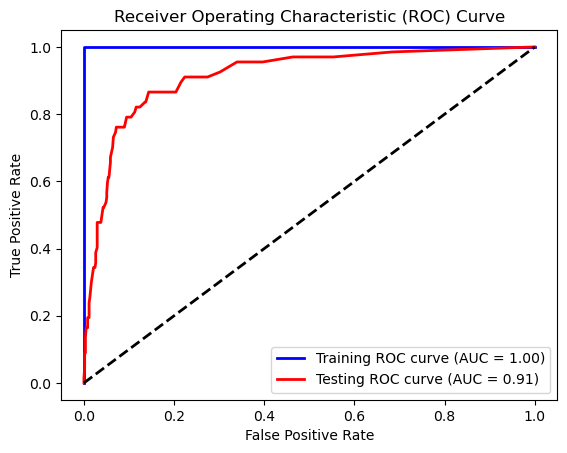

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have already trained your RandomForestClassifier
# classifier on the training data and obtained predictions on
# both training and testing data
y_train_pred_prob = rf_classifier.predict_proba(X_train)[:, 1]
y_test_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)

# Compute ROC curve and ROC area for testing data
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)

# Plot ROC curve for training and testing data
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Testing ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Problem:2

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [76]:
data=pd.read_csv("download.csv")


In [77]:
data

Date  Infosys  Indian Hotel  Mahindra & Mahindra  Axis Bank  SAIL  \
0    31-03-2014      264            69                  455        263    68   
1    07-04-2014      257            68                  458        276    70   
2    14-04-2014      254            68                  454        270    68   
3    21-04-2014      253            68                  488        283    68   
4    28-04-2014      256            65                  482        282    63   
..          ...      ...           ...                  ...        ...   ...   
309  02-03-2020      729           120                  469        658    33   
310  09-03-2020      634           114                  427        569    30   
311  16-03-2020      577            90                  321        428    27   
312  23-03-2020      644            75                  293        360    21   
313  30-03-2020      633            75                  284        379    23   

     Shree Cement  Sun Pharma  Jindal Steel  Idea Vodafone  Jet Airways  
0            5543         555           298             83          278  
1            5728         610           279             84          303  
2            5649         607           279             83          280  
3            5692         604           274             83          282  
4            5582         611           238             79          243  
..            ...         ...           ...            ...          ...  
309         23110         401           146              3           22  
310         21308         384           121              6           18  
311         18904         365           105              3           16  
312         17666         338            89              3           14  
313         17546         352            82              3           14  

[314 rows x 11 columns]

In [78]:
print('The number of rows (observations) is',data.shape[0],'\n''The number of columns (variables) is',data.shape[1])


The number of rows (observations) is 314 
The number of columns (variables) is 11


In [79]:
data.head()


Date  Infosys  Indian Hotel  Mahindra & Mahindra  Axis Bank  SAIL  \
0  31-03-2014      264            69                  455        263    68   
1  07-04-2014      257            68                  458        276    70   
2  14-04-2014      254            68                  454        270    68   
3  21-04-2014      253            68                  488        283    68   
4  28-04-2014      256            65                  482        282    63   

   Shree Cement  Sun Pharma  Jindal Steel  Idea Vodafone  Jet Airways  
0          5543         555           298             83          278  
1          5728         610           279             84          303  
2          5649         607           279             83          280  
3          5692         604           274             83          282  
4          5582         611           238             79          243

In [80]:
data.tail()

Date  Infosys  Indian Hotel  Mahindra & Mahindra  Axis Bank  SAIL  \
309  02-03-2020      729           120                  469        658    33   
310  09-03-2020      634           114                  427        569    30   
311  16-03-2020      577            90                  321        428    27   
312  23-03-2020      644            75                  293        360    21   
313  30-03-2020      633            75                  284        379    23   

     Shree Cement  Sun Pharma  Jindal Steel  Idea Vodafone  Jet Airways  
309         23110         401           146              3           22  
310         21308         384           121              6           18  
311         18904         365           105              3           16  
312         17666         338            89              3           14  
313         17546         352            82              3           14

In [81]:
data.columns = data.columns.str.replace(' ', '_').str.replace('&','and')


In [82]:
data.columns

Index(['Date', 'Infosys', 'Indian_Hotel', 'Mahindra_and_Mahindra', 'Axis_Bank',
       'SAIL', 'Shree_Cement', 'Sun_Pharma', 'Jindal_Steel', 'Idea_Vodafone',
       'Jet_Airways'],
      dtype='object')

In [83]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   314 non-null    object
 1   Infosys                314 non-null    int64 
 2   Indian_Hotel           314 non-null    int64 
 3   Mahindra_and_Mahindra  314 non-null    int64 
 4   Axis_Bank              314 non-null    int64 
 5   SAIL                   314 non-null    int64 
 6   Shree_Cement           314 non-null    int64 
 7   Sun_Pharma             314 non-null    int64 
 8   Jindal_Steel           314 non-null    int64 
 9   Idea_Vodafone          314 non-null    int64 
 10  Jet_Airways            314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [84]:
data.describe()

Infosys  Indian_Hotel  Mahindra_and_Mahindra   Axis_Bank  \
count  314.000000    314.000000             314.000000  314.000000   
mean   511.340764    114.560510             636.678344  540.742038   
std    135.952051     22.509732             102.879975  115.835569   
min    234.000000     64.000000             284.000000  263.000000   
25%    424.000000     96.000000             572.000000  470.500000   
50%    466.500000    115.000000             625.000000  528.000000   
75%    630.750000    134.000000             678.000000  605.250000   
max    810.000000    157.000000             956.000000  808.000000   

             SAIL  Shree_Cement   Sun_Pharma  Jindal_Steel  Idea_Vodafone  \
count  314.000000    314.000000   314.000000    314.000000     314.000000   
mean    59.095541  14806.410828   633.468153    147.627389      53.713376   
std     15.810493   4288.275085   171.855893     65.879195      31.248985   
min     21.000000   5543.000000   338.000000     53.000000       3.000000   
25%     47.000000  10952.250000   478.500000     88.250000      25.250000   
50%     57.000000  16018.500000   614.000000    142.500000      53.000000   
75%     71.750000  17773.250000   785.000000    182.750000      82.000000   
max    104.000000  24806.000000  1089.000000    338.000000     117.000000   

       Jet_Airways  
count   314.000000  
mean    372.659236  
std     202.262668  
min      14.000000  
25%     243.250000  
50%     376.000000  
75%     534.000000  
max     871.000000

In [85]:
data.duplicated().sum()

0

In [86]:
plt.figure(figsize = (10, 8))
data['dates'] = [pd.to_datetime(d) for d in data['Date']]

<Figure size 1000x800 with 0 Axes>

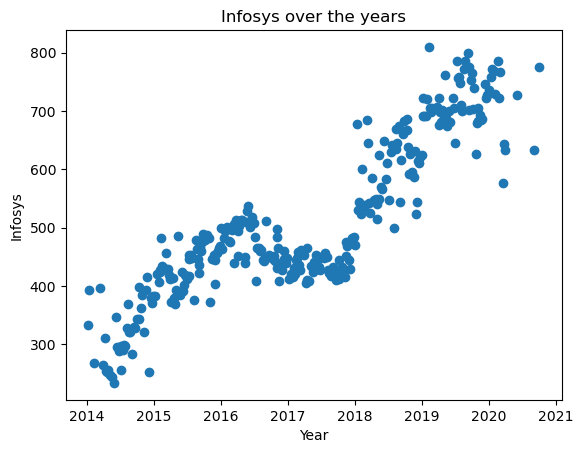

In [87]:
plt.scatter(data['dates'], data['Infosys'])
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys over the years')
plt.show()

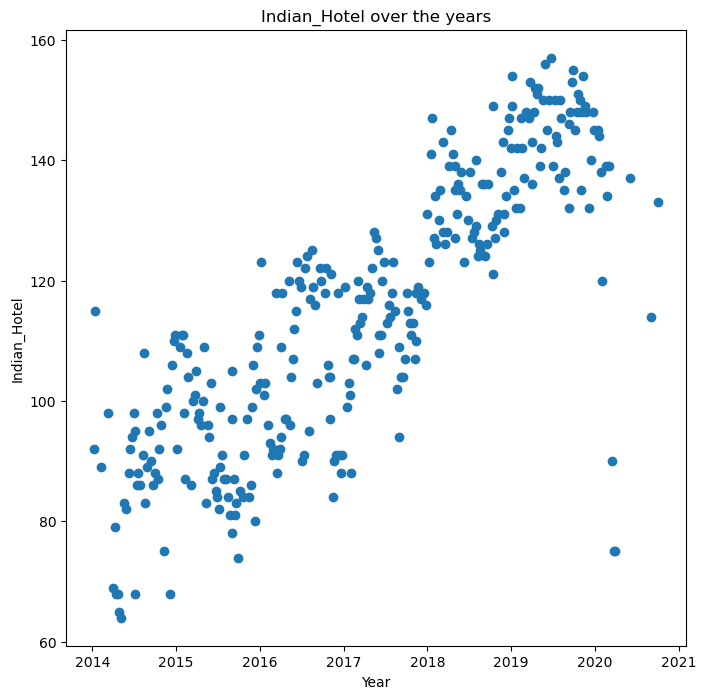

In [88]:
plt.figure(figsize = (8, 8))
data['dates'] = [pd.to_datetime(d) for d in data['Date']]
plt.scatter(data['dates'], data['Indian_Hotel'])
plt.xlabel('Year')
plt.ylabel('Indian_Hotel')
plt.title('Indian_Hotel over the years')
plt.show()

In [89]:
stock_returns = np.log(data.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

In [92]:
stock_returns

Infosys  Indian_Hotel  Mahindra_and_Mahindra  Axis_Bank      SAIL  \
0         NaN           NaN                    NaN        NaN       NaN   
1   -0.026873     -0.014599               0.006572   0.048247  0.028988   
2   -0.011742      0.000000              -0.008772  -0.021979 -0.028988   
3   -0.003945      0.000000               0.072218   0.047025  0.000000   
4    0.011788     -0.045120              -0.012371  -0.003540 -0.076373   
..        ...           ...                    ...        ...       ...   
309  0.009649     -0.110348               0.030305  -0.057580 -0.087011   
310 -0.139625     -0.051293              -0.093819  -0.145324 -0.095310   
311 -0.094207     -0.236389              -0.285343  -0.284757 -0.105361   
312  0.109856     -0.182322              -0.091269  -0.173019 -0.251314   
313 -0.017228      0.000000              -0.031198   0.051432  0.090972   

     Shree_Cement  Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways  
0             NaN         NaN           NaN            NaN          NaN  
1        0.032831    0.094491     -0.065882       0.011976     0.086112  
2       -0.013888   -0.004930      0.000000      -0.011976    -0.078943  
3        0.007583   -0.004955     -0.018084       0.000000     0.007117  
4       -0.019515    0.011523     -0.140857      -0.049393    -0.148846  
..            ...         ...           ...            ...          ...  
309      0.023688    0.072383     -0.053346      -0.287682    -0.127833  
310     -0.081183   -0.043319     -0.187816       0.693147    -0.200671  
311     -0.119709   -0.050745     -0.141830      -0.693147    -0.117783  
312     -0.067732   -0.076851     -0.165324       0.000000    -0.133531  
313     -0.006816    0.040585     -0.081917       0.000000     0.000000  

[314 rows x 10 columns]

In [90]:
stock_returns.shape

(314, 10)

In [93]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                  0.002794
Indian_Hotel             0.000266
Mahindra_and_Mahindra   -0.001506
Axis_Bank                0.001167
SAIL                    -0.003463
Shree_Cement             0.003681
Sun_Pharma              -0.001455
Jindal_Steel            -0.004123
Idea_Vodafone           -0.010608
Jet_Airways             -0.009548
dtype: float64

In [94]:
stock_std = stock_returns.std(axis = 0).round(5)
stock_std

Infosys                  0.03507
Indian_Hotel             0.04713
Mahindra_and_Mahindra    0.04017
Axis_Bank                0.04583
SAIL                     0.06219
Shree_Cement             0.03992
Sun_Pharma               0.04503
Jindal_Steel             0.07511
Idea_Vodafone            0.10432
Jet_Airways              0.09797
dtype: float64

In [95]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_std})
df

Average  Volatility
Infosys                0.002794     0.03507
Indian_Hotel           0.000266     0.04713
Mahindra_and_Mahindra -0.001506     0.04017
Axis_Bank              0.001167     0.04583
SAIL                  -0.003463     0.06219
Shree_Cement           0.003681     0.03992
Sun_Pharma            -0.001455     0.04503
Jindal_Steel          -0.004123     0.07511
Idea_Vodafone         -0.010608     0.10432
Jet_Airways           -0.009548     0.09797

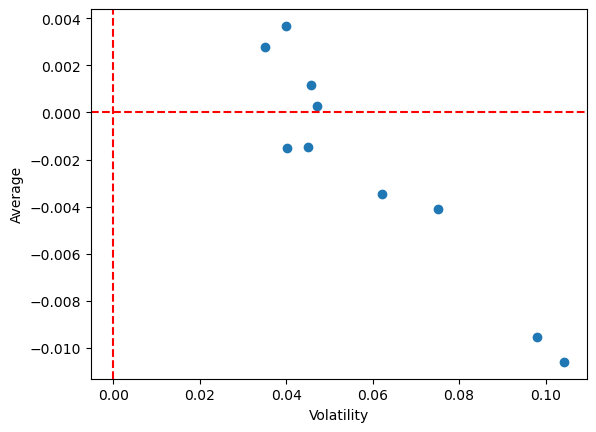

In [110]:
plt.scatter(df['Volatility'], df['Average'])

plt.axvline(x=0, linestyle='--', color='red')
plt.axhline(y=0, linestyle='--', color='red')
plt.xlabel('Volatility')
plt.ylabel('Average')
plt.show()
